# Conociendo nuestros datos de pingüinos. 🗺🧭🐧

## Instalar librerías necesarias

```
!pip install --upgrade pip
```
```
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info
```

## Importar librerías

In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de los gráficos

In [2]:
#Set default para los gráficos
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Utilizando el paquete `palmerpenguins`

#### Datos crudos

In [3]:
from palmerpenguins import load_penguins_raw
from palmerpenguins import load_penguins
raw_penguins = load_penguins_raw()
display(raw_penguins)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


#### Datos previamente procesados

In [4]:
penguins = load_penguins()
display(penguins)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### Utilizando los conjuntos de datos de `seaborn`

In [5]:
sns.load_dataset('penguins')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Utilizando la interfaz de `Deepnote`

Links de importación de datos:

- [Conjunto de datos crudos](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins_raw.csv).
- [Conjunto de datos previamente procesados](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv).

In [6]:
raw_csv = pd.read_csv('penguins_raw.csv',sep=',')
raw_csv

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


In [7]:
csv = pd.read_csv('penguins.csv',sep=',')
csv

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# Colecta y validación de datos

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [8]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [9]:
penguins.dtypes.value_counts()

float64    4
object     3
int64      1
dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [10]:
penguins.shape

(344, 8)

## ¿Existen valores nulos explícitos en el conjunto de datos?

In [11]:
penguins.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [12]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [13]:
penguins.isnull().sum().sum()

19

## ¿Cuál es la proporción de valores nulos por cada variable?

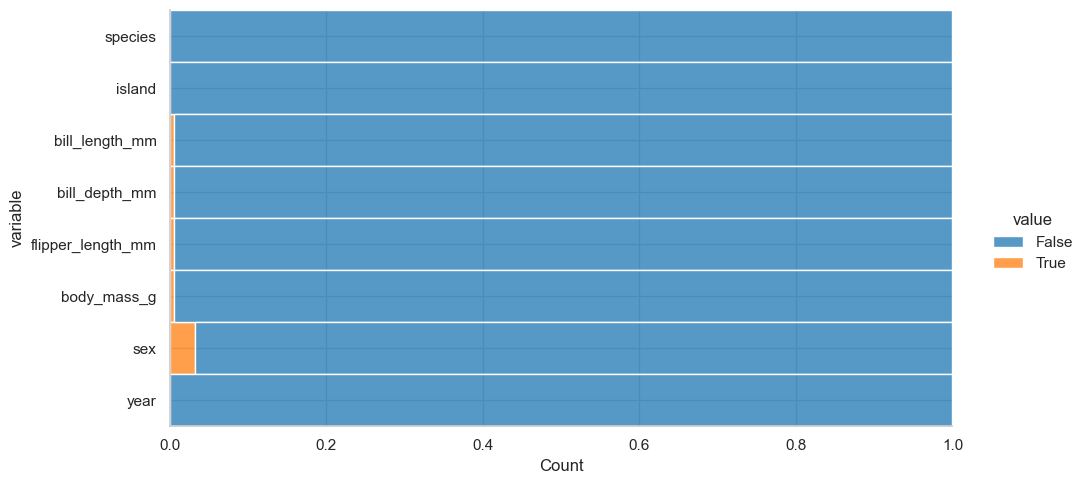

In [14]:
penguins.isnull().melt().pipe(lambda df: sns.displot(data=df,y='variable',hue='value',multiple='fill',aspect=2))
#DF, si es nulo, que haga melt, pipe, lambda, displot, aspect2, y=variable y hue el valor True False, fill 

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

<AxesSubplot: >

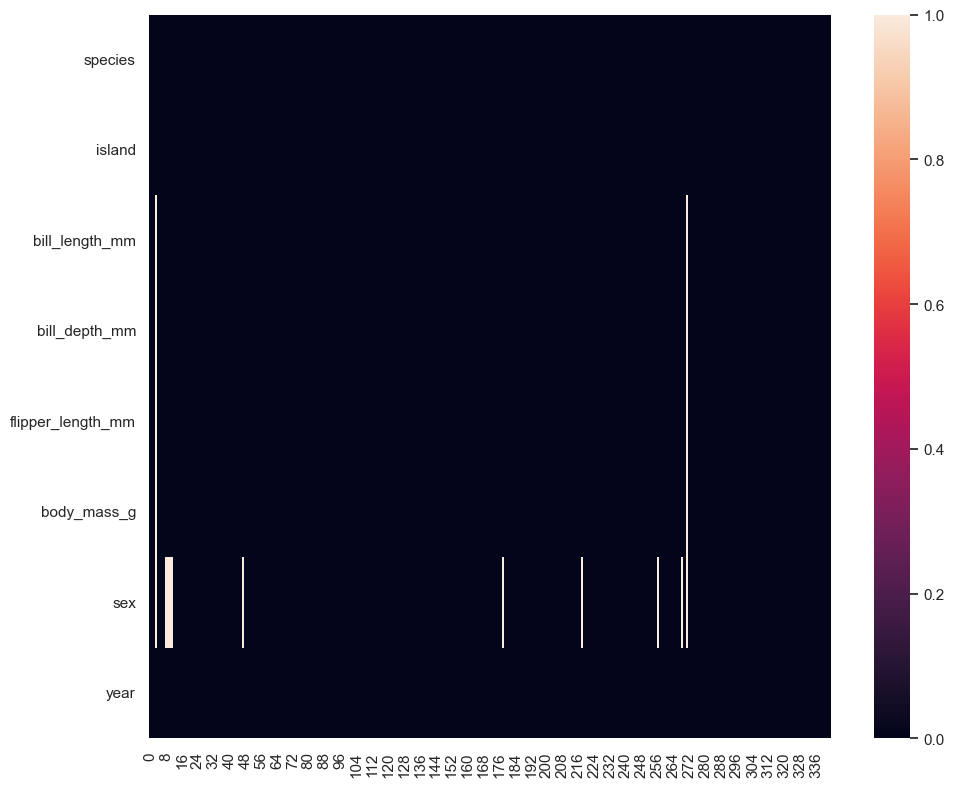

In [15]:
#Por pingüinos
penguins.transpose().isnull().pipe(lambda df: sns.heatmap(data=df))

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [16]:
p_penguins = penguins.dropna()
p_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [17]:
p_penguins.isnull().any()

species              False
island               False
bill_length_mm       False
bill_depth_mm        False
flipper_length_mm    False
body_mass_g          False
sex                  False
year                 False
dtype: bool

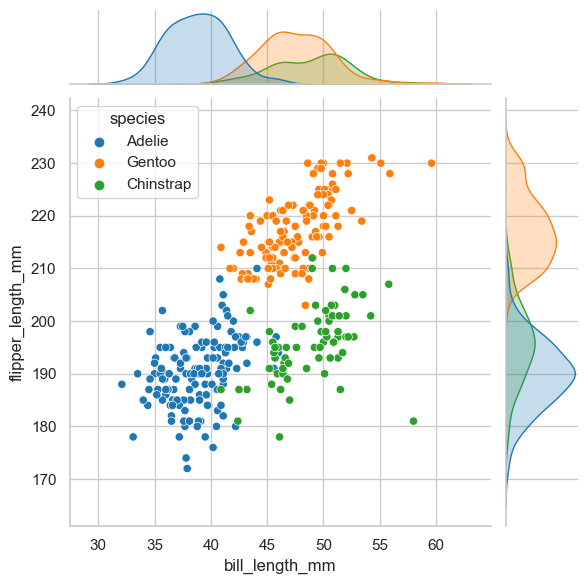

In [18]:
sns.jointplot(data=p_penguins,x='bill_length_mm',y='flipper_length_mm',hue='species')

# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [19]:
p_penguins.describe(include = 'all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


### Solo las numéricas

In [20]:
p_penguins.describe(include = np.number)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### Solo categóricas - 1

In [21]:
p_penguins.describe(include = object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


### Solo categóricas - 2

In [22]:
p_penguins['species'].astype('category')
p_penguins['island'].astype('category')
p_penguins['sex'].astype('category')
p_penguins.describe(include='object')

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


## ¿Cómo visualizar los conteos?

### Pandas

<AxesSubplot: >

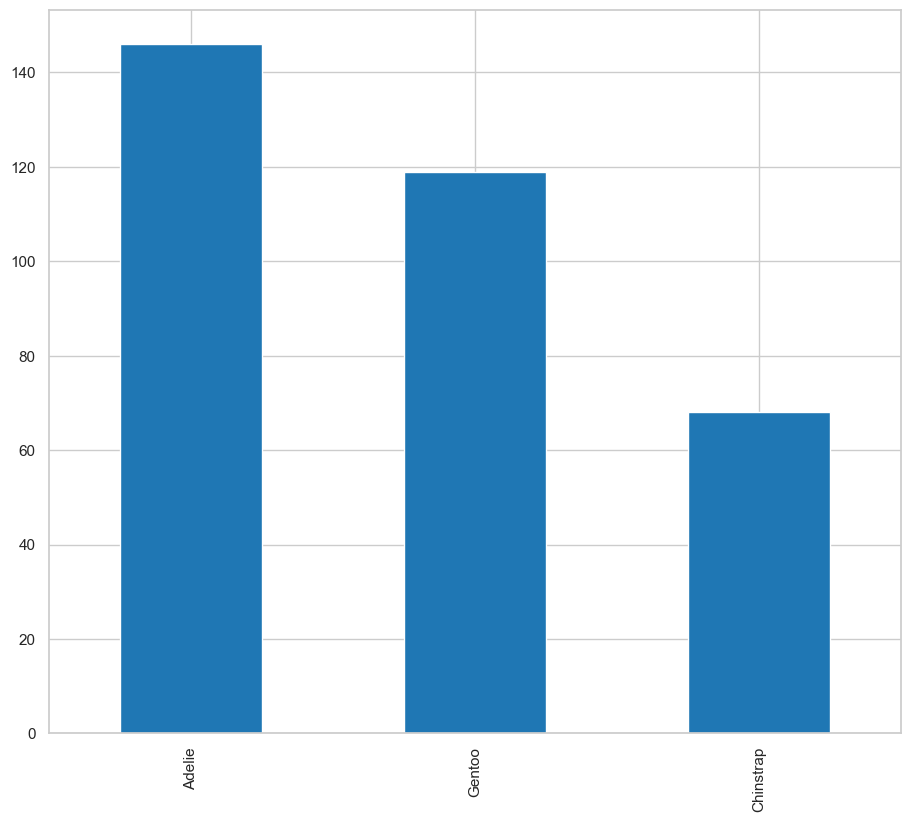

In [23]:
p_penguins['species'].value_counts().plot(kind='bar')

### Seabornvalue_counts

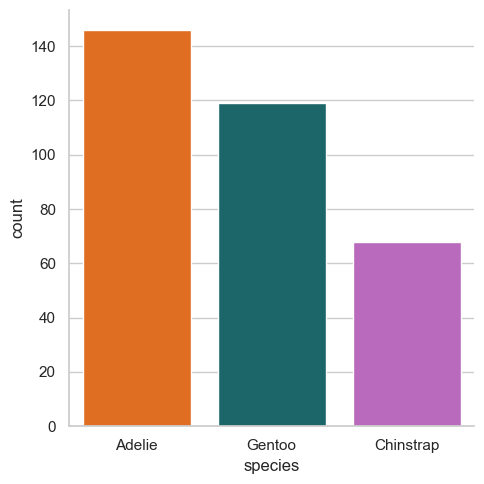

In [24]:
sns.catplot(data=p_penguins,x='species',kind='count',palette=penguin_color)

<AxesSubplot: xlabel='species', ylabel='count'>

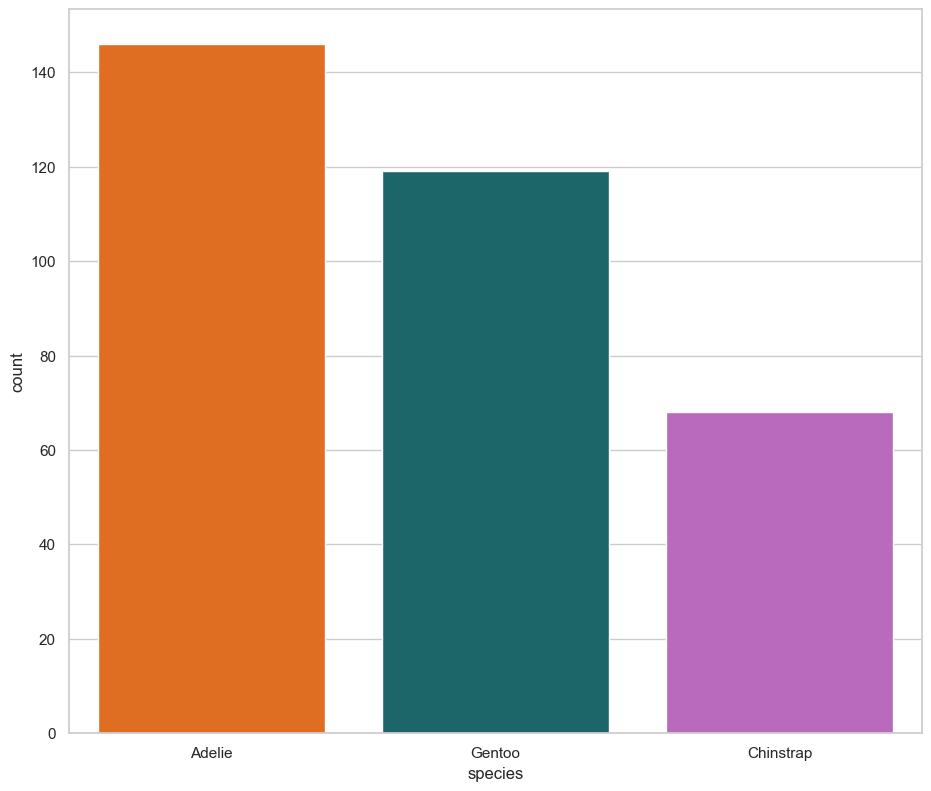

In [25]:
p_penguins.value_counts('species',sort=True).reset_index(name='count').pipe(
lambda df: (sns.barplot(data=df,x='species',y='count',palette=penguin_color)))

### ¿Cómo visualizar las proporciones?

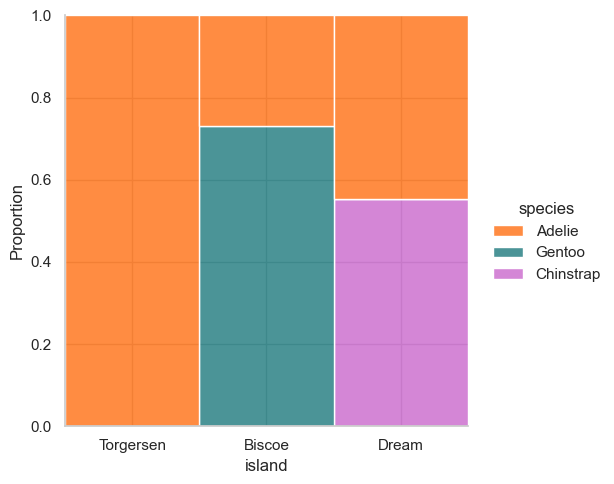

In [26]:
p_penguins.add_column('x','').pipe(lambda df:(sns.displot(data=df,x='island',hue='species',
                                                         multiple='fill',palette=penguin_color,stat='proportion')))

# Medidas de tendencia centralpenguin_color

## Media o promedio

In [27]:
p_penguins.mean(numeric_only=True)

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

## Mediana

In [28]:
p_penguins.median(numeric_only=True)

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

## Moda

In [29]:
p_penguins.mode(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,41.1,17.0,190.0,3800.0,2009


# Medidas de dispersión

## ¿Cuál es el valor máximo de las variables?

In [30]:
p_penguins.max()

species                 Gentoo
island               Torgersen
bill_length_mm            59.6
bill_depth_mm             21.5
flipper_length_mm        231.0
body_mass_g             6300.0
sex                       male
year                      2009
dtype: object

## ¿Cuál es el valor mínimo de las variables?

In [31]:
p_penguins.min()

species              Adelie
island               Biscoe
bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
sex                  female
year                   2007
dtype: object

## ¿Cuál es el rango de las variables?

In [32]:
p_penguins.max(numeric_only=True)-p_penguins.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?

In [33]:
p_penguins.mean(numeric_only=True)

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

In [34]:
p_penguins.std(numeric_only=True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [35]:
sns.scatterplot(
    x=x,
    y=y
)

fx_1 = np.array([x.min(), x.max()])
fy_1 =  res_x_y.intercept + res_x_y.slope *  fx_1

plt.plot(fx_1, fy_1)

NameError: name 'x' is not defined

In [ ]:
sns.scatterplot(
    x=y,
    y=x
)

fx_2 = np.array([y.min(), y.max()])
fy_2 =  res_y_x.intercept + res_y_x.slope *  fx_2

plt.plot(fx_2, fy_2)

In [ ]:
sns.scatterplot(
    x=x,
    y=y
)

plt.plot(fx_1, fy_1)
plt.plot(fy_2, fx_2)

## ¿Cuál es el rango intercuartílico?

In [36]:
p_penguins.quantile(0.25,numeric_only=True)

bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
year                 2007.0
Name: 0.25, dtype: float64

In [37]:
p_penguins.quantile(0.50,numeric_only=True)

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
Name: 0.5, dtype: float64

In [38]:
p_penguins.quantile(0.75,numeric_only=True)

bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
year                 2009.0
Name: 0.75, dtype: float64

In [39]:
p_penguins.quantile(0.75,numeric_only=True) - p_penguins.quantile(0.25,numeric_only=True)

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [40]:
p_penguins.quantile(q=[0.75,0.5,0.25],numeric_only=True).transpose()

,0.75,0.50,0.25
bill_length_mm,48.6,44.5,39.5
bill_depth_mm,18.7,17.3,15.6
flipper_length_mm,213.0,197.0,190.0
body_mass_g,4775.0,4050.0,3550.0
year,2009.0,2008.0,2007.0


In [41]:
p_penguins.quantile(q=[0.75,0.5,0.25],numeric_only=True).transpose().rename_axis('variable').reset_index().assign(iqr = lambda df:df[0.75]-df[0.25])

,variable,0.75,0.5,0.25,iqr
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0
4,year,2009.0,2008.0,2007.0,2.0


## ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

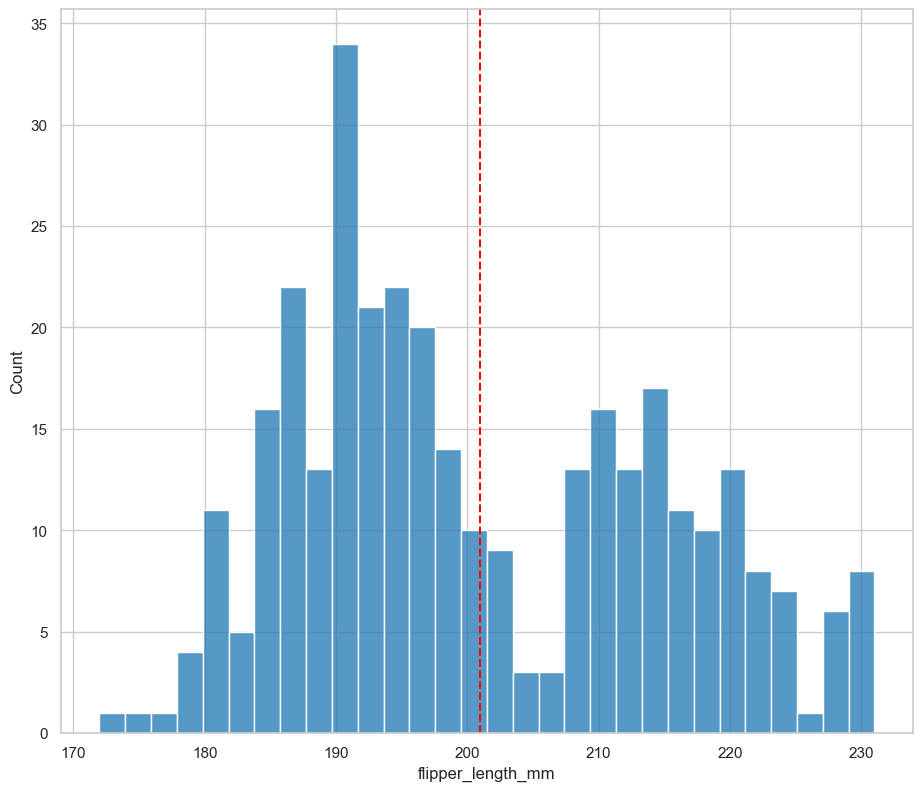

In [42]:
sns.histplot(data=p_penguins,x='flipper_length_mm',bins=30)
plt.axvline(x=p_penguins['flipper_length_mm'].mean(),color='r',linestyle='--')

### Diagrama de caja / boxplot

<AxesSubplot: xlabel='flipper_length_mm'>

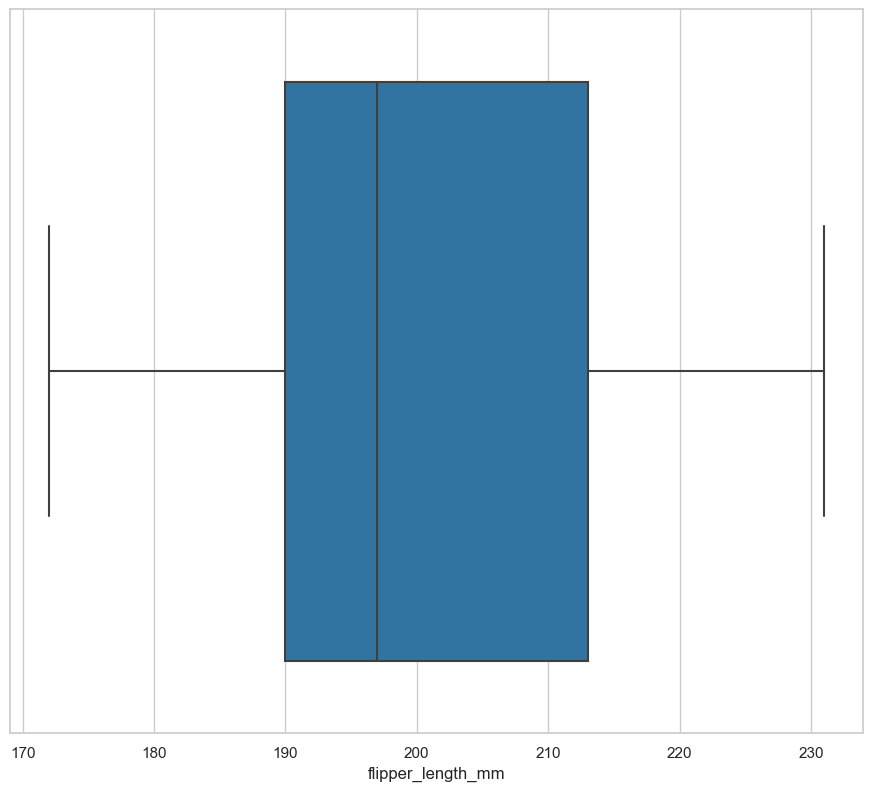

In [43]:
sns.boxplot(data=p_penguins,x='flipper_length_mm')

### Limitaciones

In [44]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

In [45]:
freedman_diaconis_bindwidth(p_penguins)

C:\Users\Mateo\AppData\Local\Temp\ipykernel_4568\3266041095.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = x.quantile(0.75) - x.quantile(0.25)


bill_length_mm         1.312885
bill_depth_mm          0.447246
flipper_length_mm      3.318280
body_mass_g          176.734504
year                   0.288546
dtype: float64

# Distribuciones: PMFs, CDFs y PDFs

## Funciones de probabilidad de masas (PMFs)

### Utilizando `seaborn`

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Probability'>

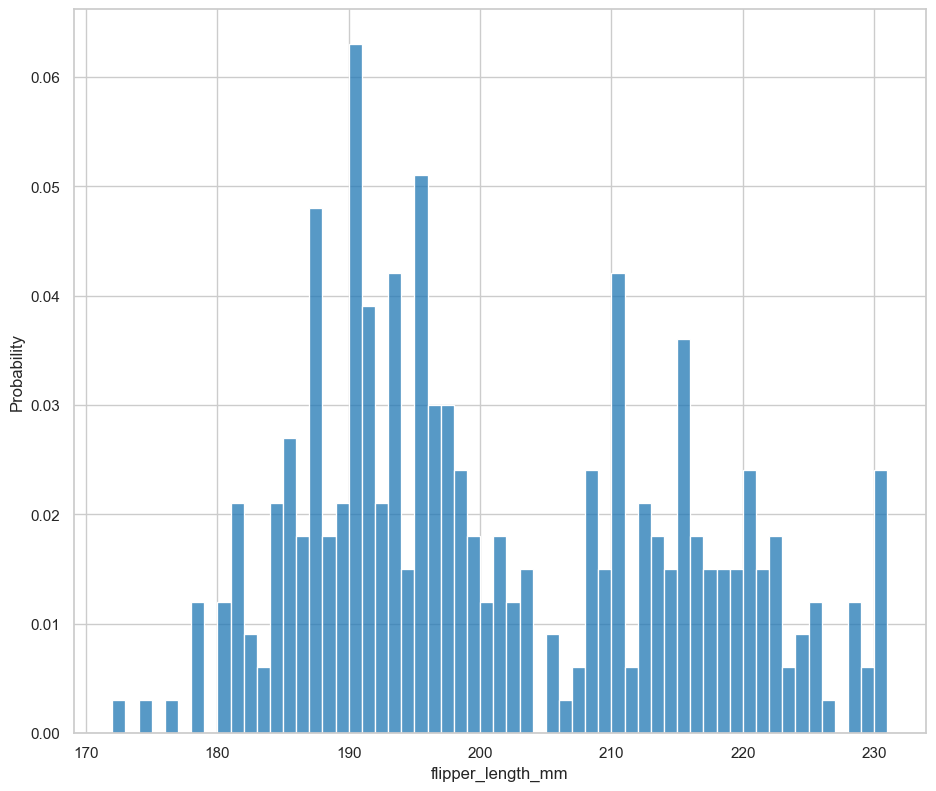

In [46]:
sns.histplot(data=p_penguins,x='flipper_length_mm',
            binwidth=1,stat='probability')

### Utilizando `empiricaldist` 

## **OJO SIEMPRE PONER NORMALIZE TRUE PARA OBTENER PROBABILIDAD,FALSE VA A DAR ES LA FRECUENCIA**

In [47]:
pmf_flipper_length= empiricaldist.Pmf.from_seq(p_penguins['flipper_length_mm'],
                          normalize=True)

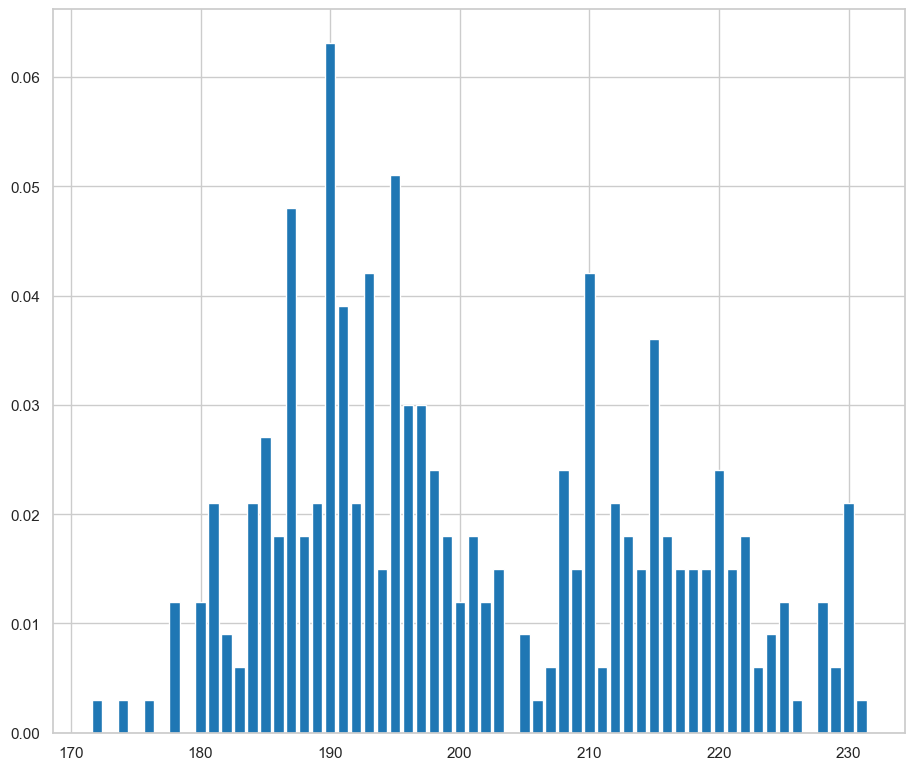

In [48]:
pmf_flipper_length.bar()

In [49]:
pmf_flipper_length(205)

0.009009009009009009

## Funciones empirícas de probabilidad acumulada (ECDFs)

### Utilizando `seaborn`

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

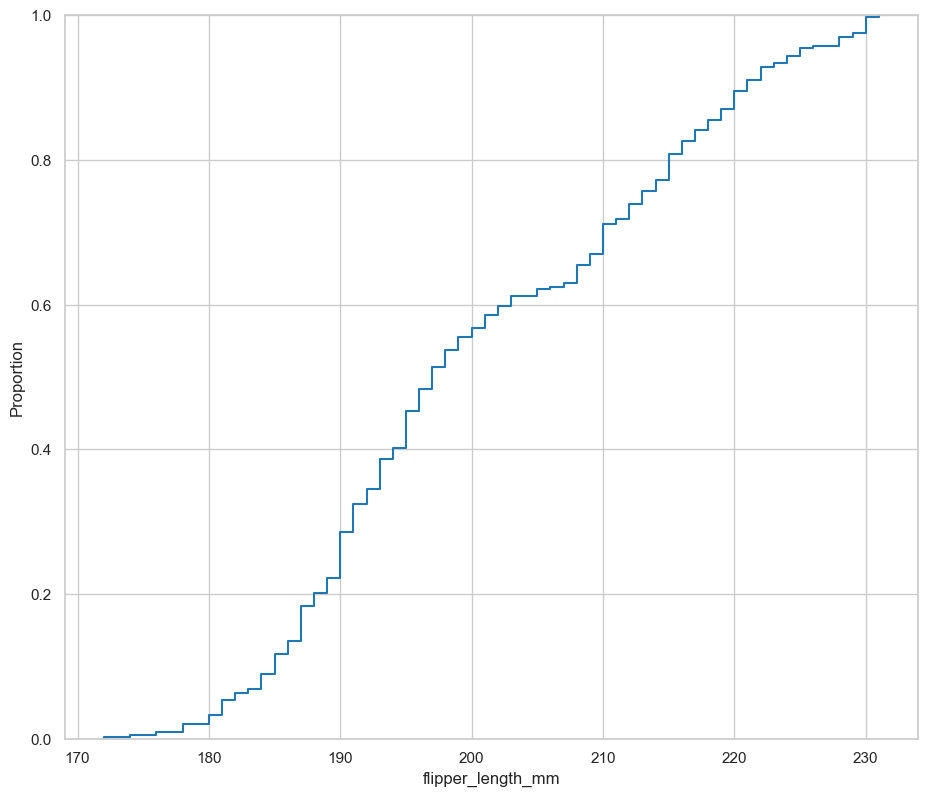

In [50]:
sns.ecdfplot(data=p_penguins,x='flipper_length_mm')

### Utilizando `empiricaldist`

Usando el ``Cdf`` la función que permite saber cuánto es la probabilidad de tener un valor o menos es forward

In [51]:
cdf_flipper_length = empiricaldist.Cdf.from_seq(p_penguins.flipper_length_mm,normalize=True)

Pidiendo una cantidad de 222 o menos el resultado es de 0.9279279279279279


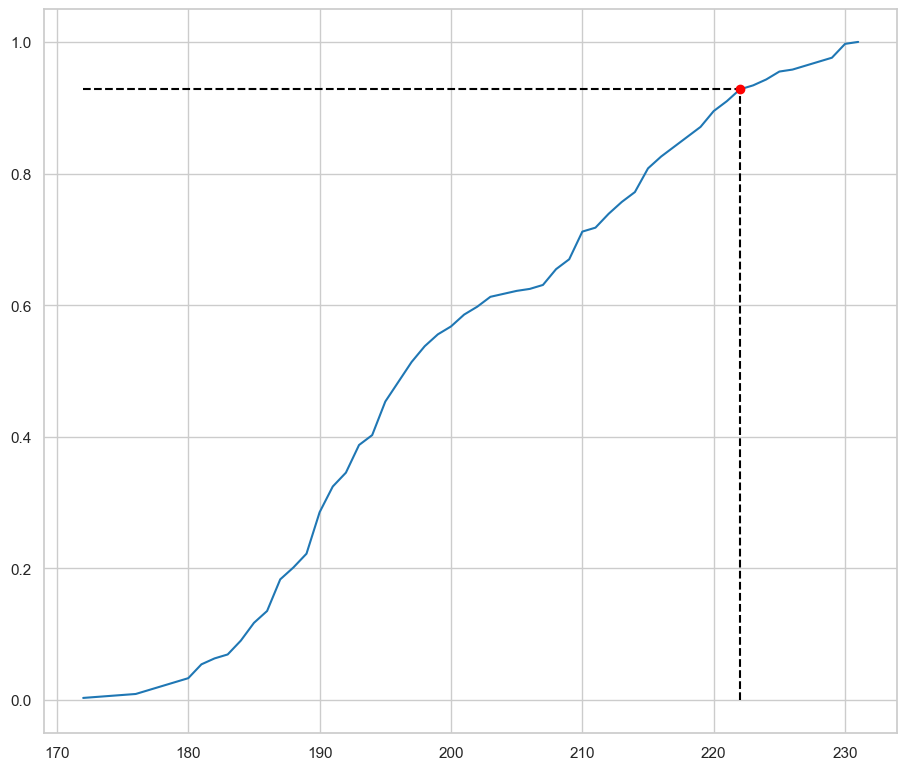

In [52]:
q = 222
p = cdf_flipper_length.forward(q)
cdf_flipper_length.plot()
plt.vlines(x=q, ymin=0,ymax=p,color='black',linestyle='--')
plt.hlines(y=p, xmin=cdf_flipper_length.qs[0],xmax=q,color='black',linestyle='--')
plt.plot(q,p,'o',color='red')
print(f'Pidiendo una cantidad de {q} o menos el resultado es de {p}')

### Comparando distribuciones

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

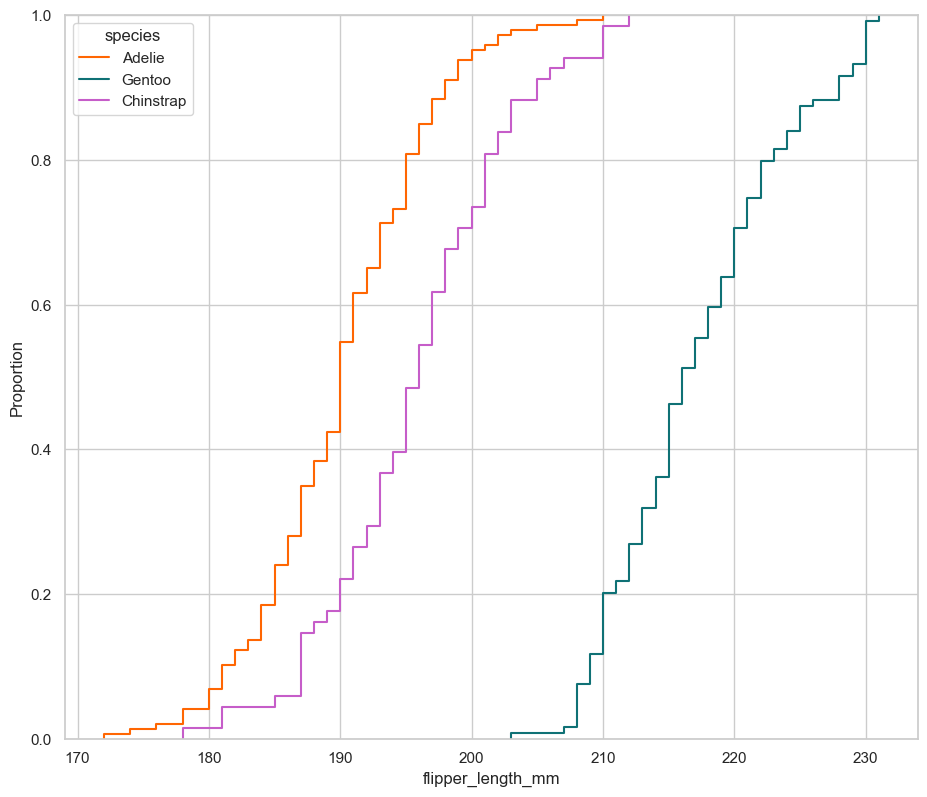

In [53]:
sns.ecdfplot(data=p_penguins,x='flipper_length_mm',
            hue='species',palette=penguin_color)

## Funciones de densidad de probabilidad

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

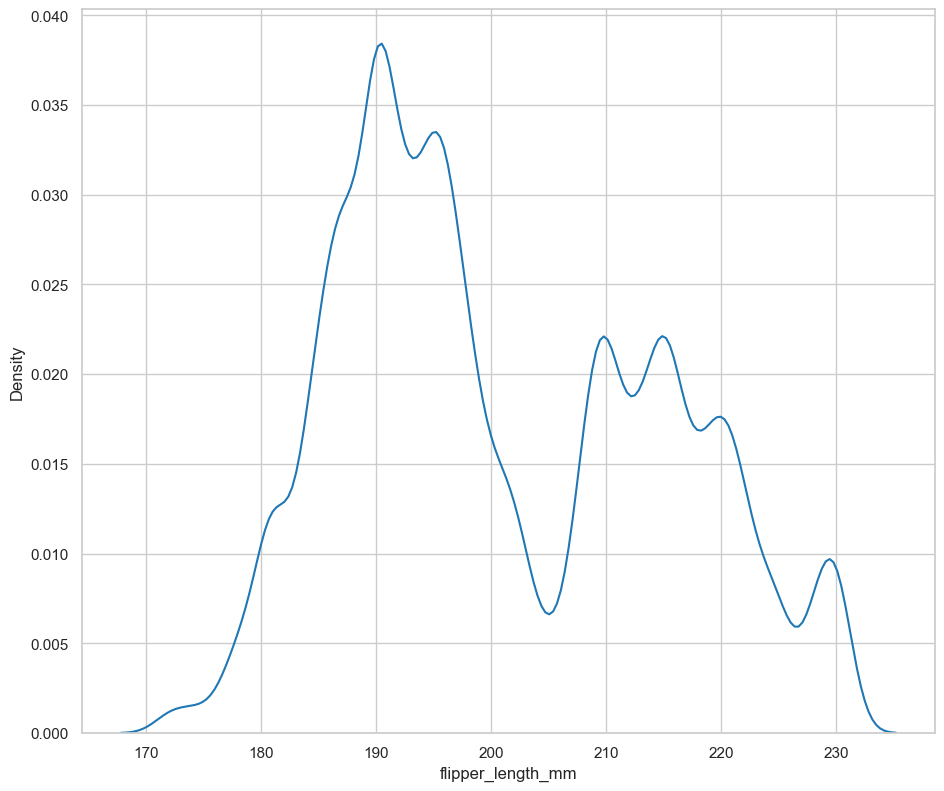

In [54]:
sns.kdeplot(data=p_penguins,x='flipper_length_mm',
           bw_method=0.1)

In [55]:
stats = p_penguins['body_mass_g'].describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

### A continuación se grafica la función de densidad de probabilidad acumulada con respecto a unos datos normales o gaussianos. 
Se hace un espacio xs en el cual se hace un linspace que contenga todos los datos desde el mínimo hasta el máximo valor posible. Luego, con 
``scipy.stats.norm `` lo que se hace es encontrar para esos xs un ys si fuera correspondiente a una normal. 
Para comparar esta suposición de normalidad se hace la gráfica real de la CDF de empiricaldist de los datos y un plot de la línea correspondiente a la real, con ello podremos ver si se parecen o no

<AxesSubplot: >

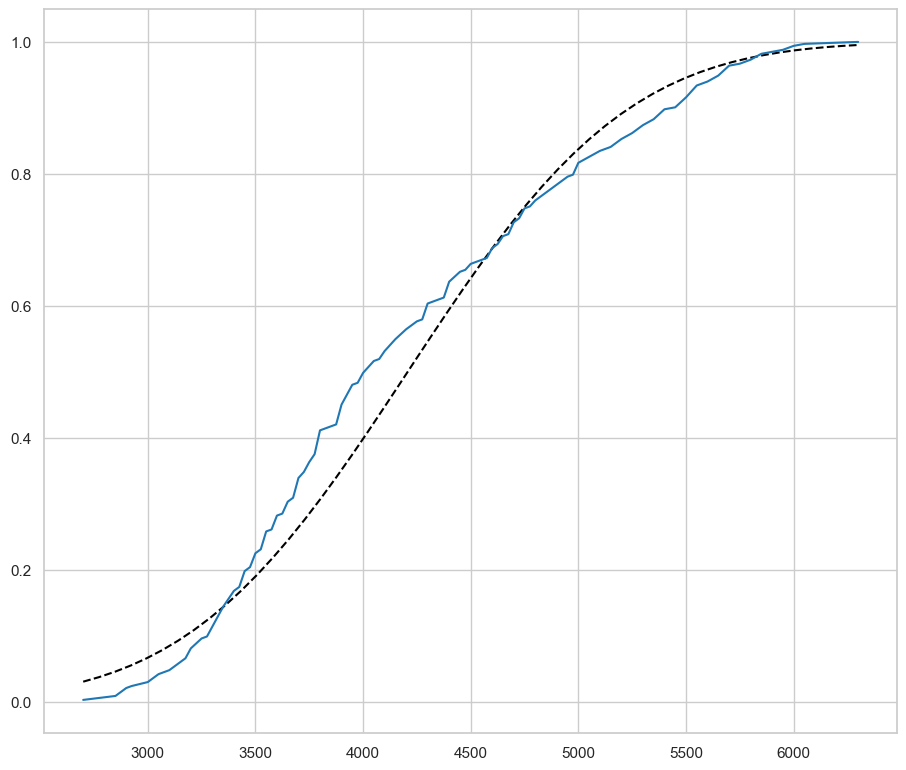

In [56]:
#Datos aleatorios y compararlos contra la distribución
xs = np.linspace(stats['min'],stats['max'])
ys = scipy.stats.norm(stats['mean'],stats['std']).cdf(xs)
ys
plt.plot(xs,ys,color='black',linestyle='--')

empiricaldist.Cdf.from_seq(p_penguins['body_mass_g'],normalize=True).plot()

<AxesSubplot: xlabel='body_mass_g', ylabel='Density'>

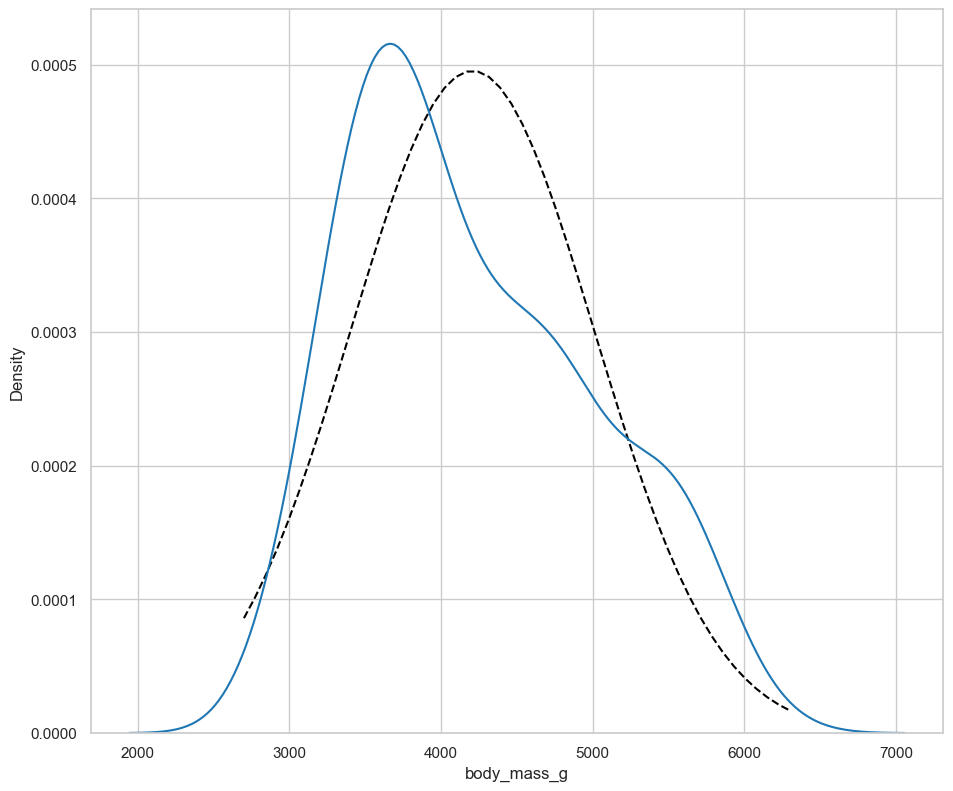

In [57]:
#Datos aleatorios y compararlos contra la distribución con PDF
xs = np.linspace(stats['min'],stats['max'])
ys = scipy.stats.norm(stats['mean'],stats['std']).pdf(xs)
ys
plt.plot(xs,ys,color='black',linestyle='--')

sns.kdeplot(data=p_penguins,x='body_mass_g')

# Ley de los Grandes Números y Teorema del Límite Central

1. Con un límite al infinito de eventos dentro de un experimento aleatorio, se tiende a la probabilidad teórica de una variable aleatoria.

2. La media de las muestras tiende aproximadamente a una distribución normal. 

## Ley de los Grandes Números

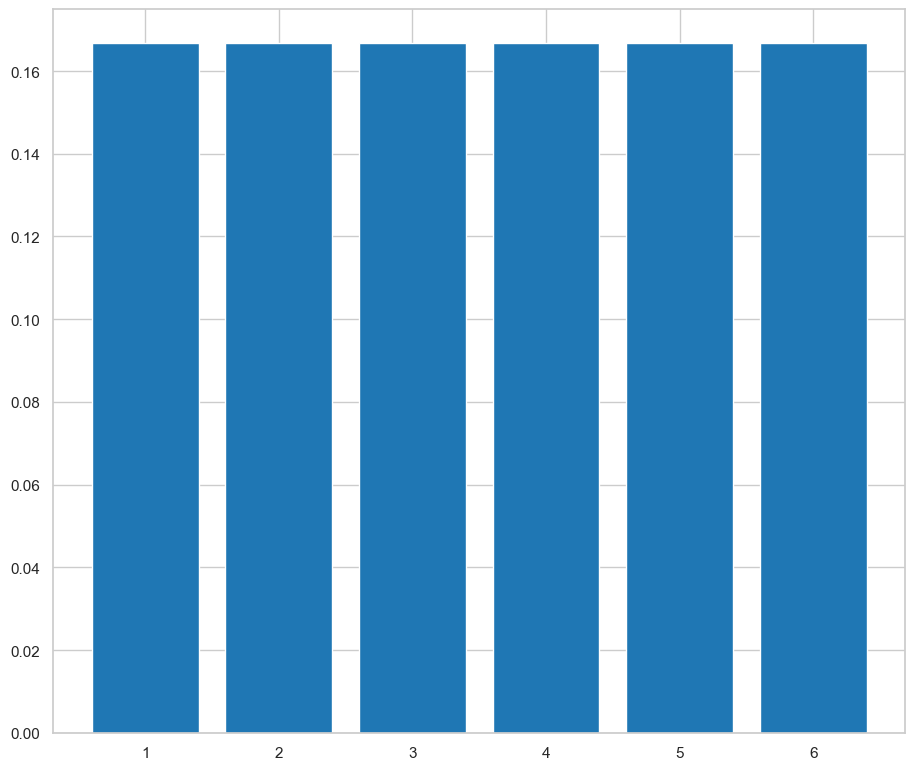

In [58]:
dice = empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
dice.bar()

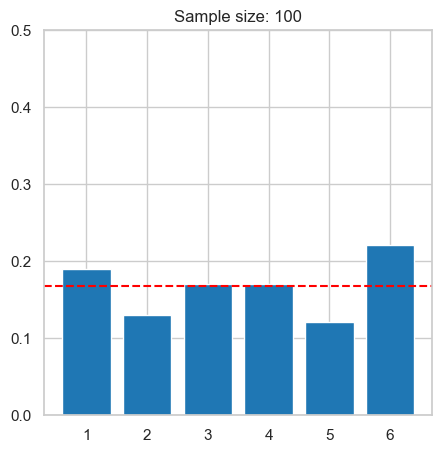

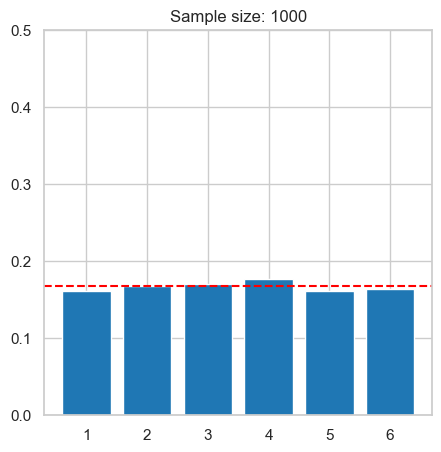

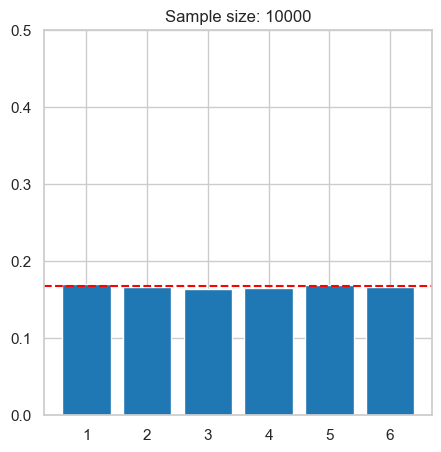

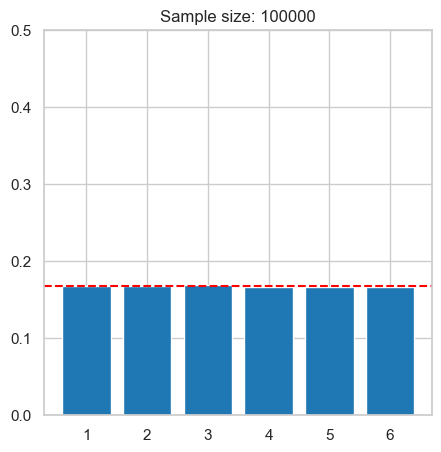

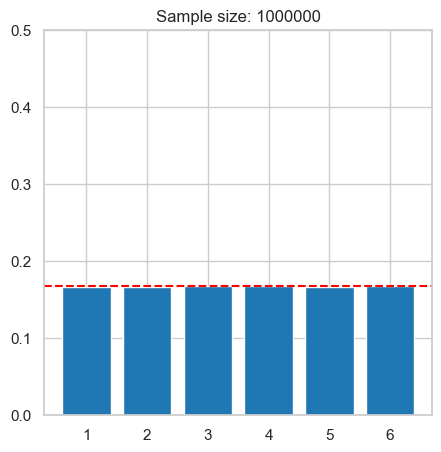

In [59]:
for sample_size in (1e2,1e3,1e4,1e5,1e6):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)
    plt.figure(figsize=(5,5))
    sample_pmf.bar()
    plt.axhline(y=1/6,color='red',linestyle='--')
    plt.ylim(0,0.5)
    plt.title(f'Sample size: {sample_size}')

## Teorema del Límite Central

<AxesSubplot: >

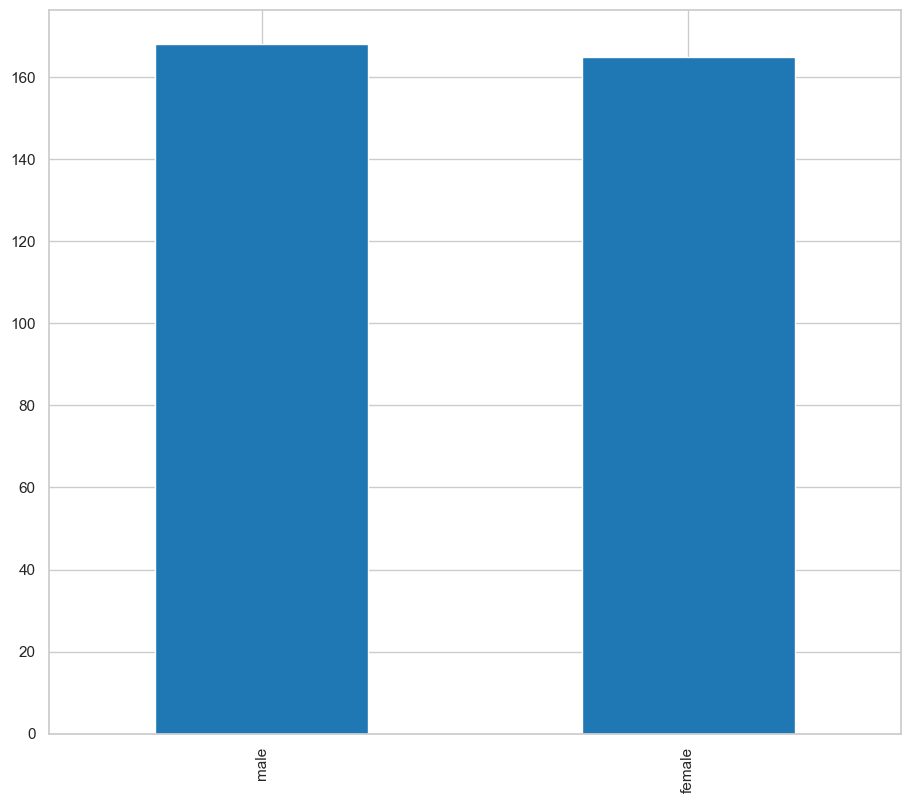

In [60]:
p_penguins['sex'].value_counts().plot(kind='bar')

In [61]:
p_penguins['sex'].value_counts(normalize=True)

male      0.504505
female    0.495495
Name: sex, dtype: float64

In [62]:
sex_numeric = p_penguins['sex'].replace(['male','female'],[1,0])
sex_numeric

0      1
1      0
2      0
4      0
5      1
      ..
339    1
340    0
341    1
342    1
343    0
Name: sex, Length: 333, dtype: int64

In [63]:
number_samples = 333
sample_size = 50

samples_df = pd.DataFrame()
np.random.seed(42)
for i in range(1,number_samples+1):
    sample = sex_numeric.sample(sample_size,replace=True).to_numpy()
    sample_name = f'sample_{i}'
    samples_df[sample_name] = sample
male = samples_df.mean().mean()
print(f'Estimado del porcentaje de los machos en el dataset es {male *100: .4f}%')


Estimado del porcentaje de los machos en el dataset es  50.1201%


C:\Users\Mateo\AppData\Local\Temp\ipykernel_4568\465898567.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sample
C:\Users\Mateo\AppData\Local\Temp\ipykernel_4568\465898567.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sample
C:\Users\Mateo\AppData\Local\Temp\ipykernel_4568\465898567.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

# Estableciendo relaciones: Gráfica de puntos

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

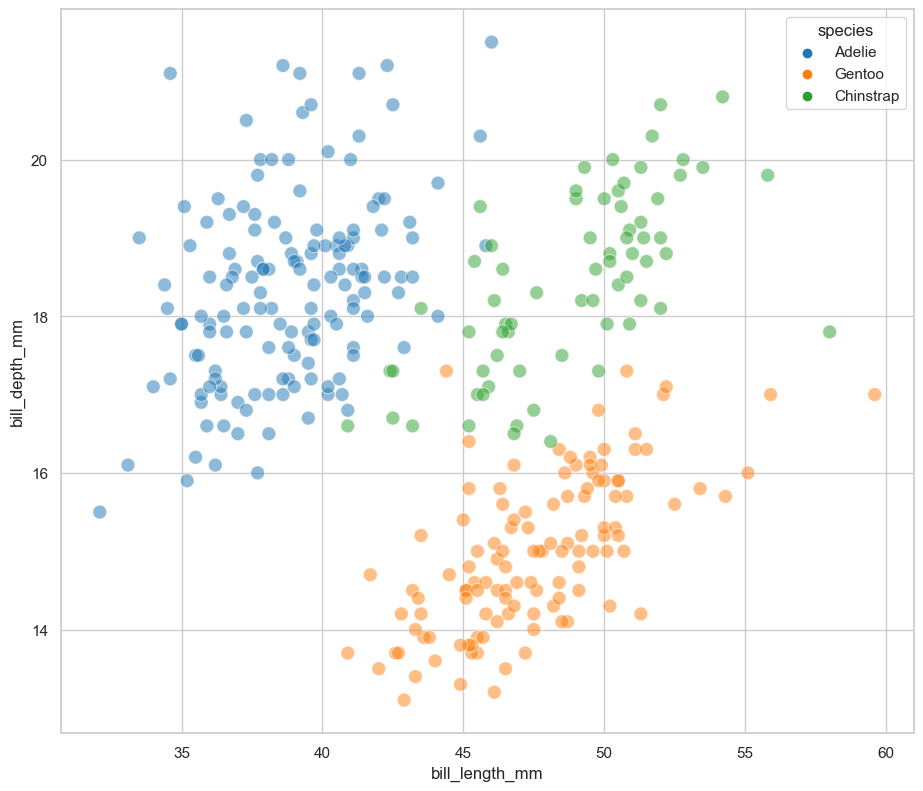

In [64]:
sns.scatterplot(data=p_penguins,x='bill_length_mm',y='bill_depth_mm',
               hue='species',alpha=0.5,s=100)

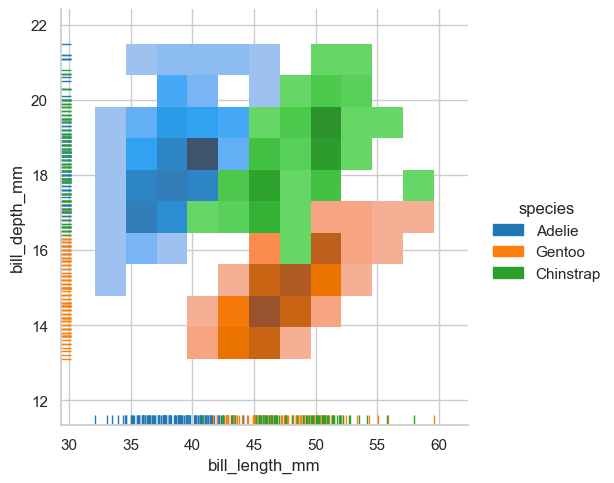

In [65]:
sns.displot(data=p_penguins,x='bill_length_mm',y='bill_depth_mm',
           hue='species',rug=True)

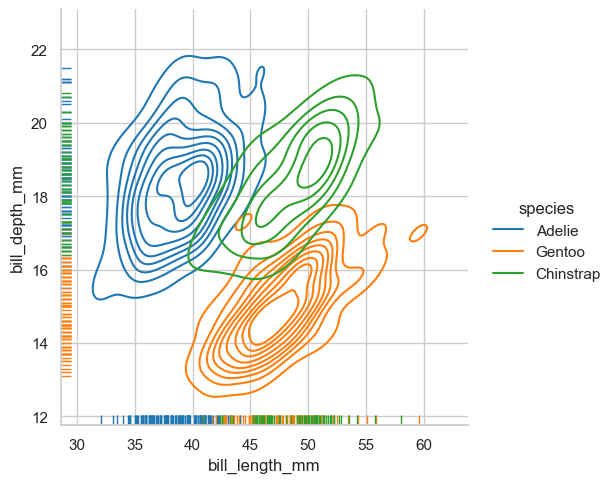

In [66]:
sns.displot(data=p_penguins,x='bill_length_mm',y='bill_depth_mm',
           hue='species',rug=True,kind='kde')

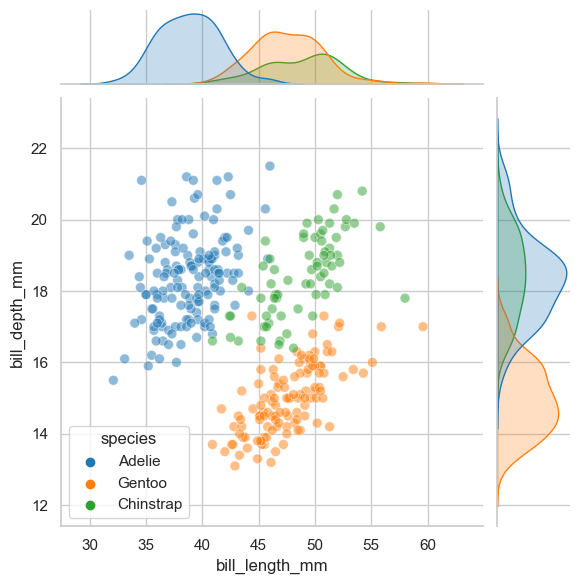

In [67]:
sns.jointplot(data=p_penguins,x='bill_length_mm',
             y='bill_depth_mm',hue='species',s=50,alpha=0.5)

# Estableciendo relaciones: Gráficos de violín y boxplots

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

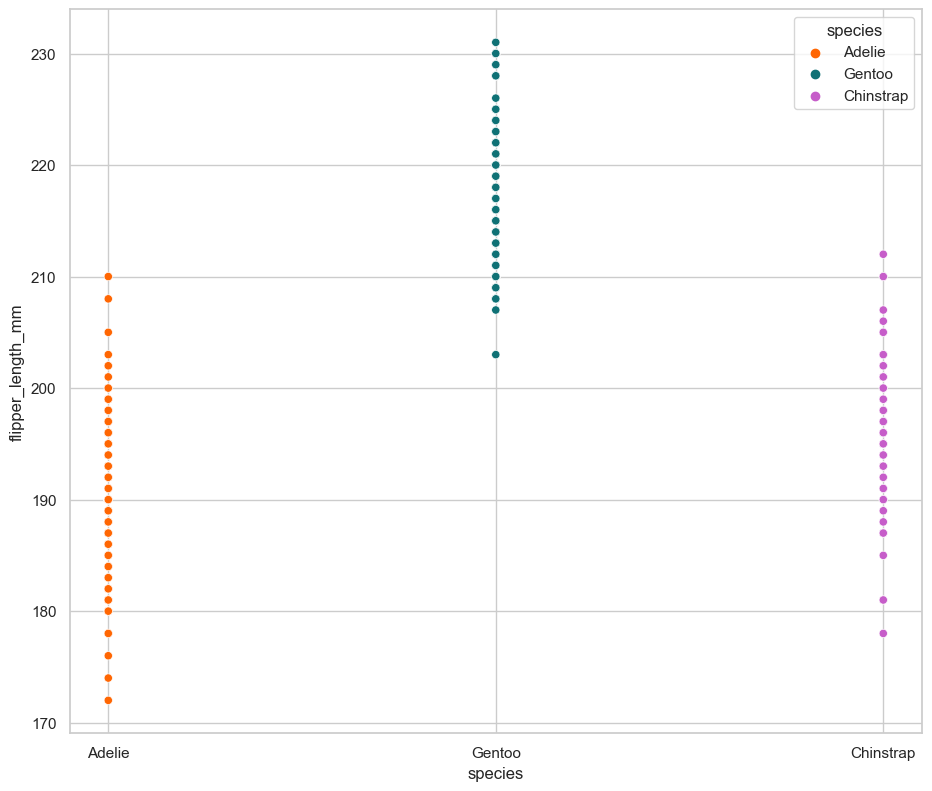

In [68]:
sns.scatterplot(data=p_penguins,x='species',
               y='flipper_length_mm',hue='species',palette=penguin_color)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

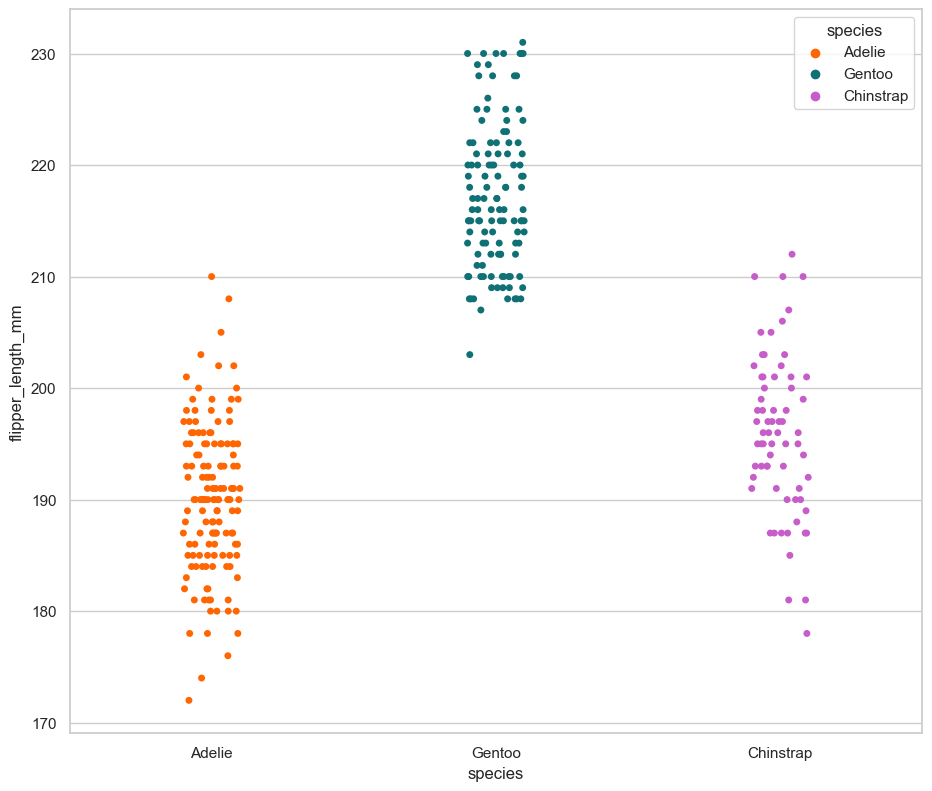

In [69]:
sns.stripplot(data = p_penguins,x='species',
             y='flipper_length_mm',hue='species',
             palette=penguin_color)

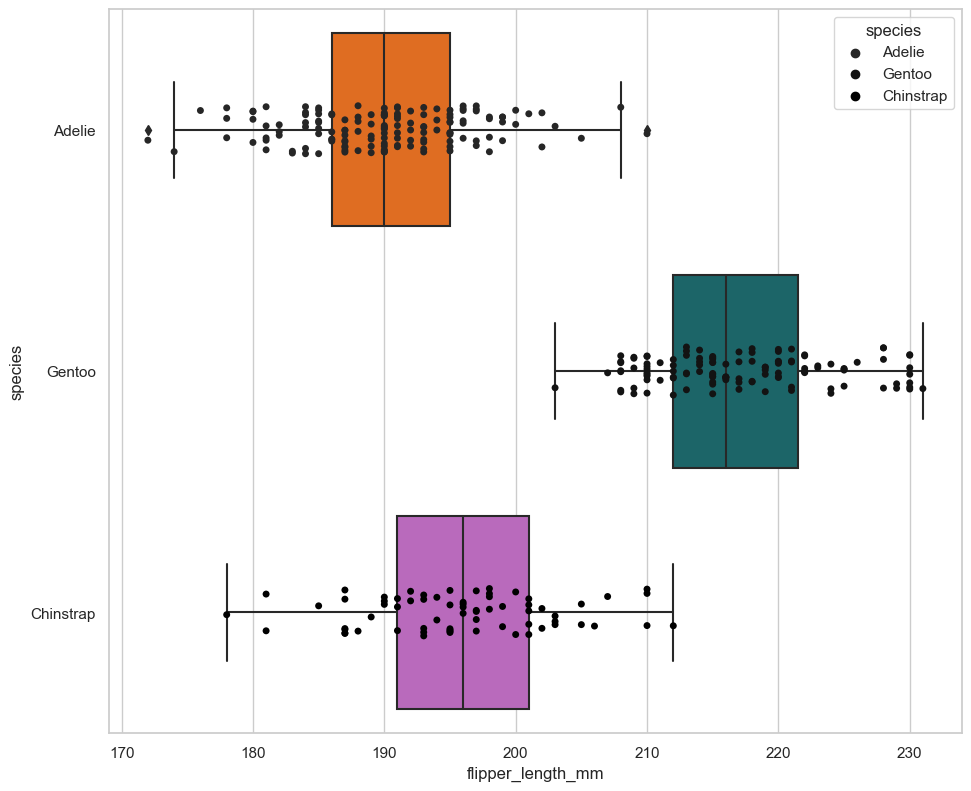

In [70]:
ax = sns.boxplot(data=p_penguins,x='flipper_length_mm',
           y='species',palette=penguin_color)
ax = sns.stripplot(data = p_penguins,x='flipper_length_mm',
                  y='species',hue='species',palette='dark:black')

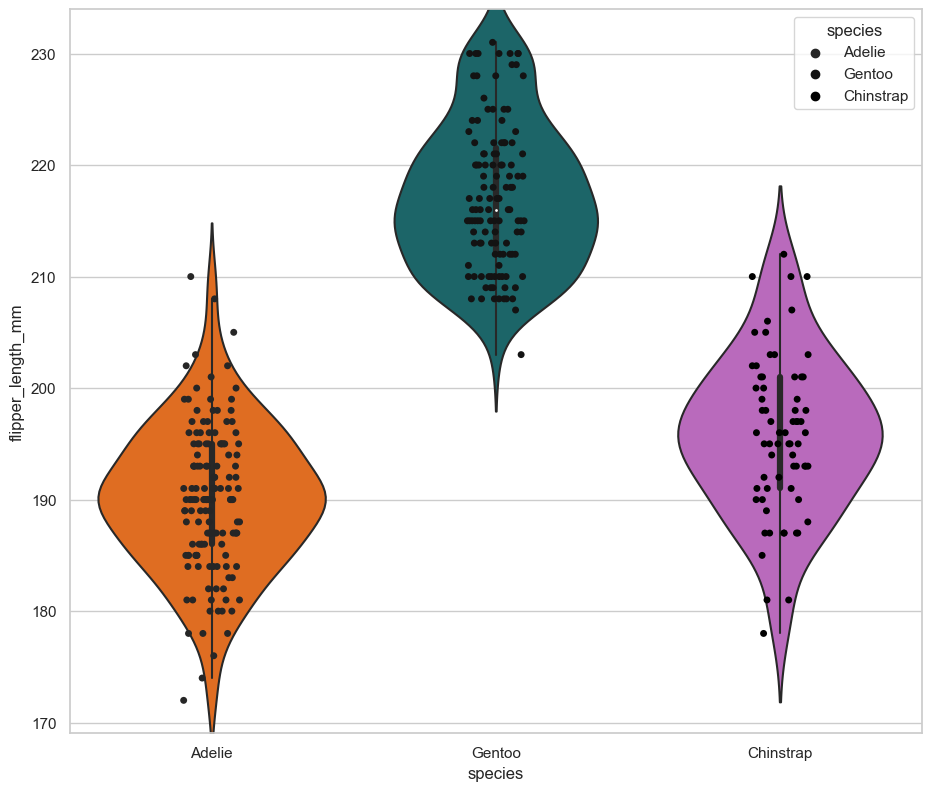

In [71]:
ax = sns.violinplot(data = p_penguins,x='species',
                   y='flipper_length_mm',palette=penguin_color)
ax = sns.stripplot(data=p_penguins,x='species',hue='species',
                   y='flipper_length_mm',
                  palette='dark:black')

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

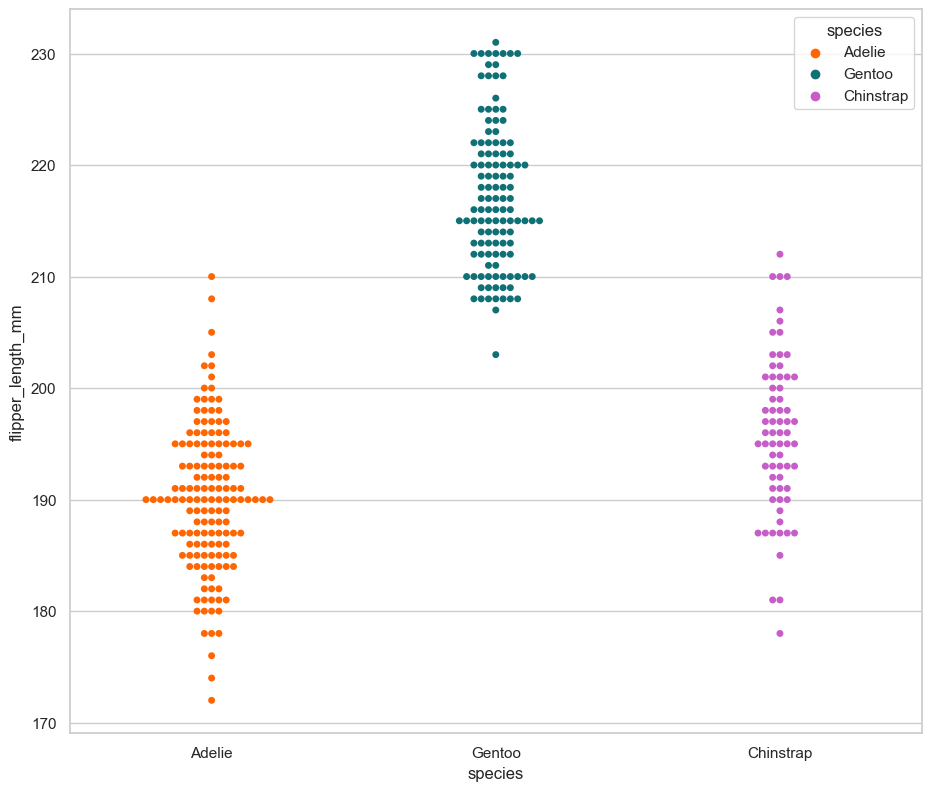

In [72]:
sns.swarmplot(data=p_penguins,x='species',hue='species',
             y='flipper_length_mm',
             palette=penguin_color)

# Estableciendo relaciones: Matrices de correlación

## ¿Existe una correlación lineal entre alguna de nuestras variables?

In [73]:
p_penguins.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


## ¿Cómo puedo visualizar los coeficientes de correlación?

<AxesSubplot: >

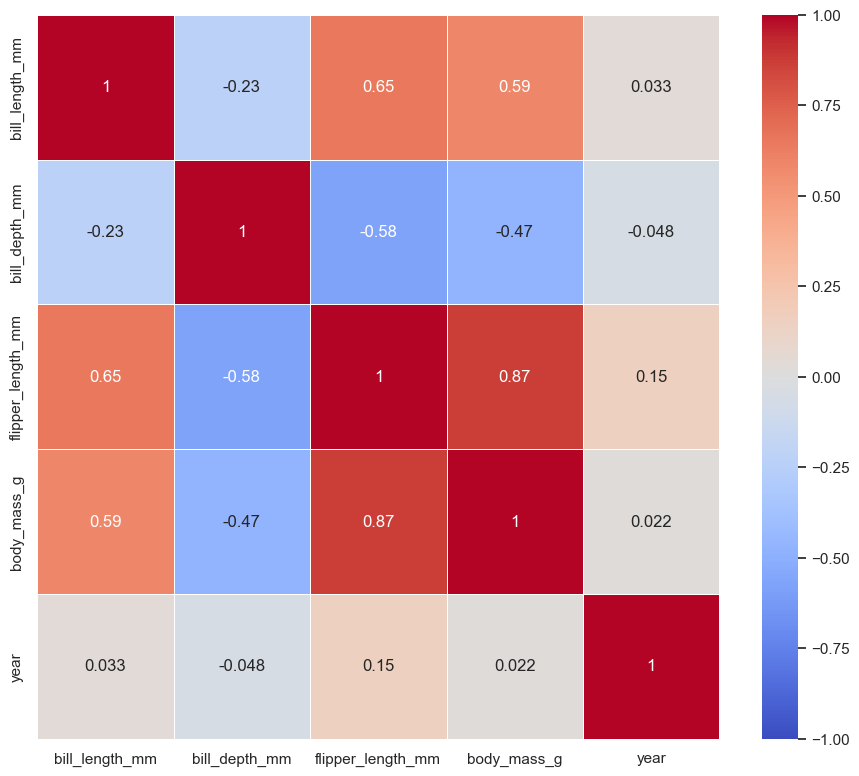

In [74]:
sns.heatmap(data=p_penguins.corr(numeric_only=True),
           center=0,vmin=-1,vmax=1,linewidths=0.5,
           annot=True,cmap='coolwarm')

### Clustermap
Es una función similar con el heatmap que tiene ``Seaborn`` pero en lugar de únicamente tener el mapa de calor, lo organiza de tal forma que haga un cluster entre los datos que tienen una correlación positiva y una negativa.
Es muy útil porque separa en el interior y exterior.

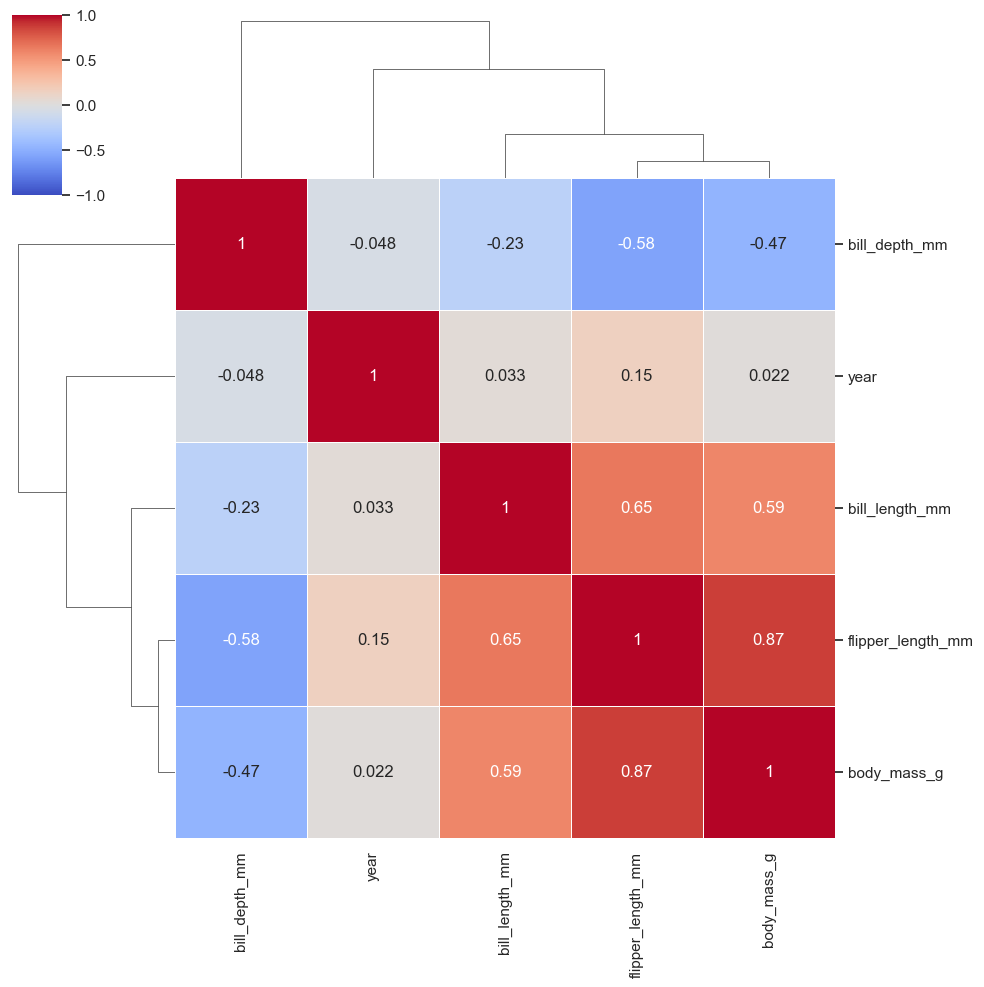

In [75]:
sns.clustermap(data=p_penguins.corr(numeric_only=True),
           center=0,vmin=-1,vmax=1,linewidths=0.5,
           annot=True,cmap='coolwarm')

## ¿Cómo podría representar una variable categórica como númerica discreta?

In [76]:
p_penguins = p_penguins.assign(numeric_sex= lambda df: df.sex.replace(['female','male'],[0,1]))

In [77]:
p_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,numeric_sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,1
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,0
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,1
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,1


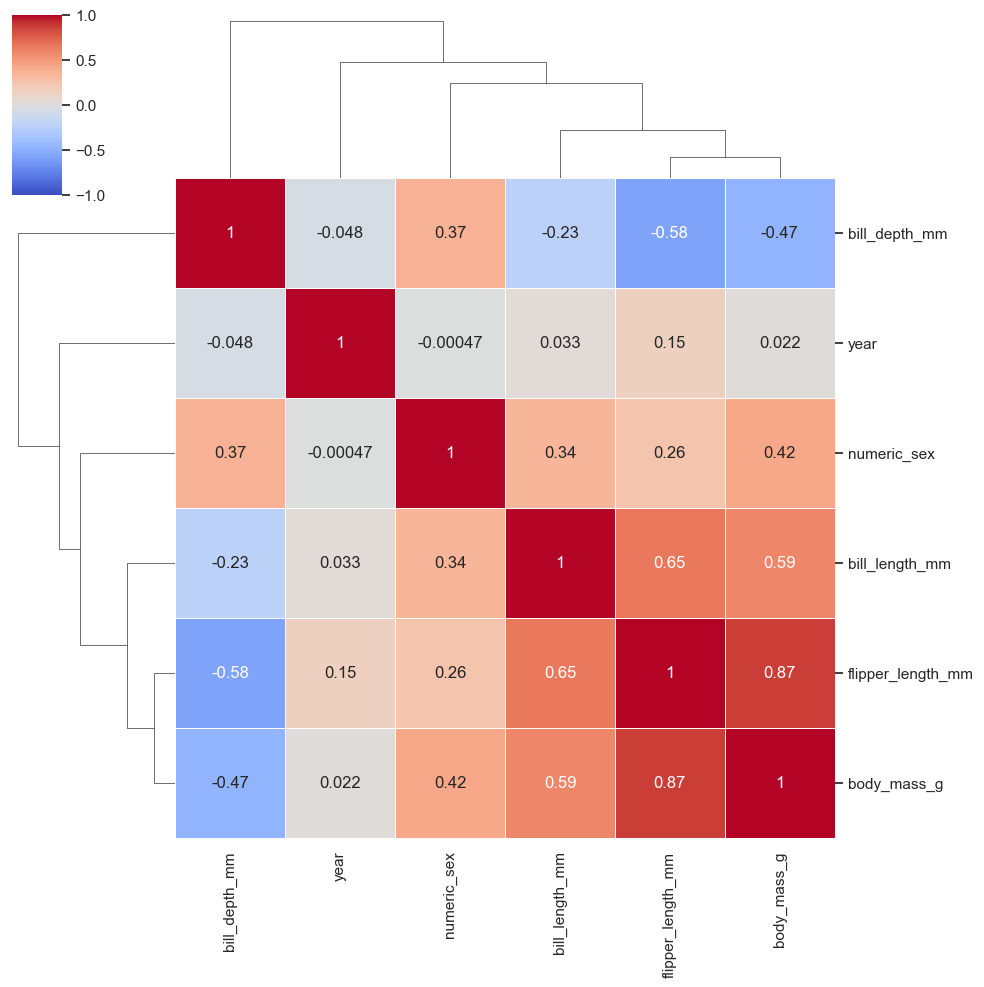

In [78]:
sns.clustermap(data=p_penguins.corr(numeric_only=True),
           center=0,vmin=-1,vmax=1,linewidths=0.5,
           annot=True,cmap='coolwarm')

## ¿Cuál es una limitante de los coeficientes de correlación lineal?

### Solo nos ayuda a determinar la posible existencia de una correlación lineal; sin embargo, su ausenecia no significa que no exista otro tipo de correlación

array([[1.        , 0.05730021],
       [0.05730021, 1.        ]])

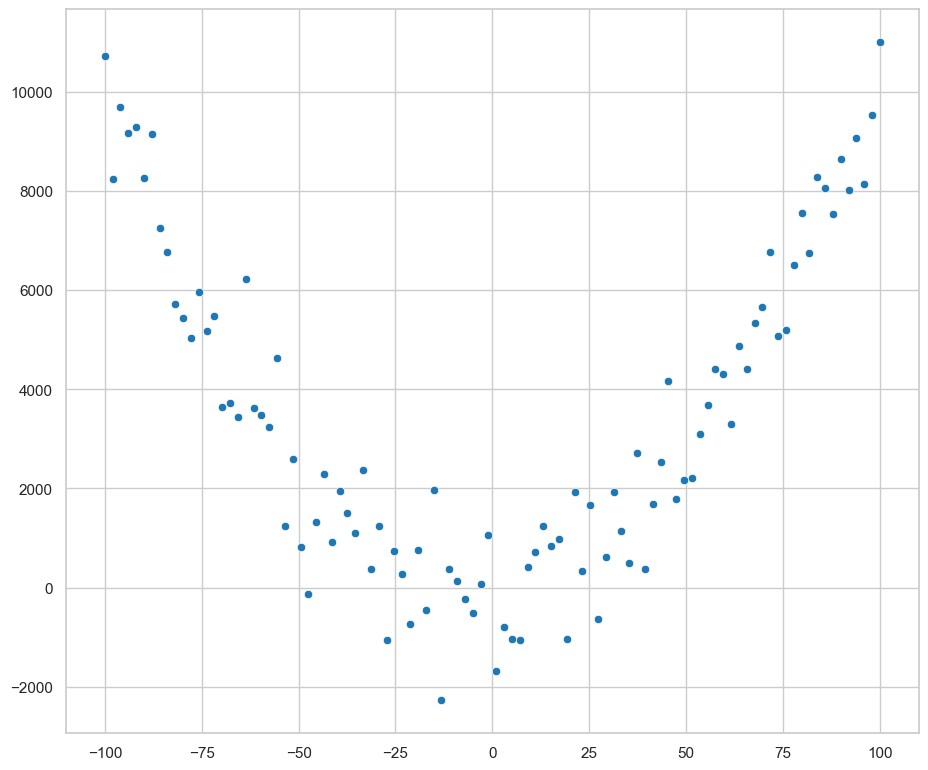

In [79]:
x = np.linspace(-100,100,100)
y = x**2
y += np.random.normal(0,1000,x.size)
sns.scatterplot(x=x,y=y)

np.corrcoef(x,y)

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

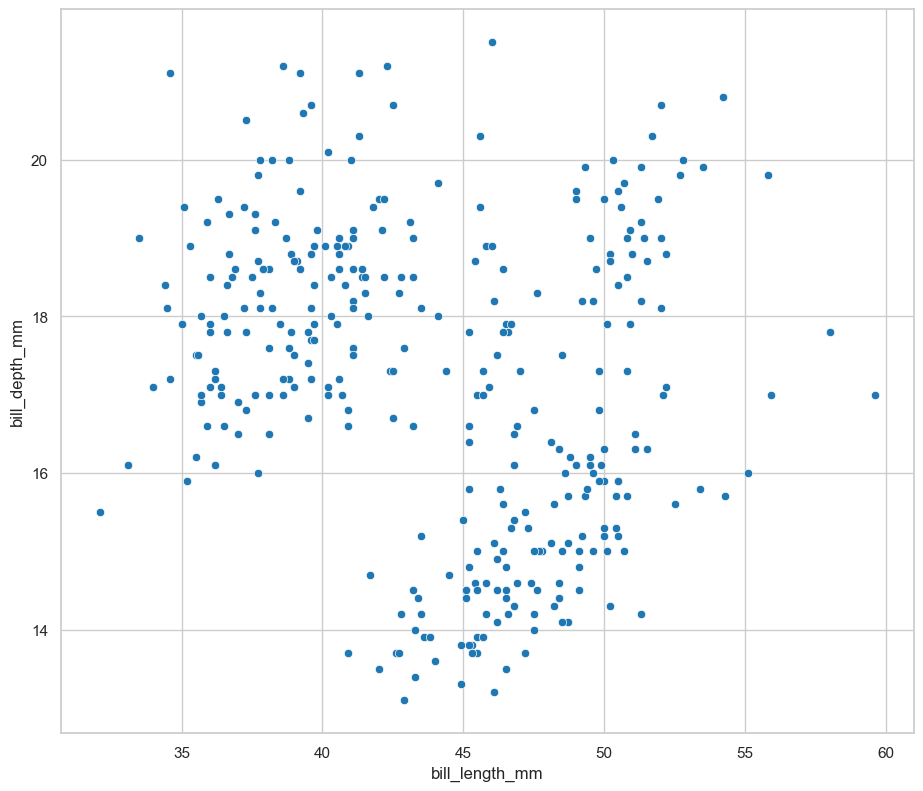

In [80]:
sns.scatterplot(data=p_penguins,x='bill_length_mm',y='bill_depth_mm')

### El coeficiente de correlación no nos habla del impacto de la relación

Es decir, se puede tener un coeficiente de correlación que sea más alto pero no significa que nos sirva para predecir o no.

# Estableciendo relaciones: Análisis de regresión simple

In [81]:
"""res_1 = scipy.stats.linregress(x=x_1,y=y_1)
res_2 = scipy.stats.linregress(x=x_2,y=y_2)

print(res_1,res_2,sep='\n')
"""

"res_1 = scipy.stats.linregress(x=x_1,y=y_1)\nres_2 = scipy.stats.linregress(x=x_2,y=y_2)\n\nprint(res_1,res_2,sep='\n')\n"

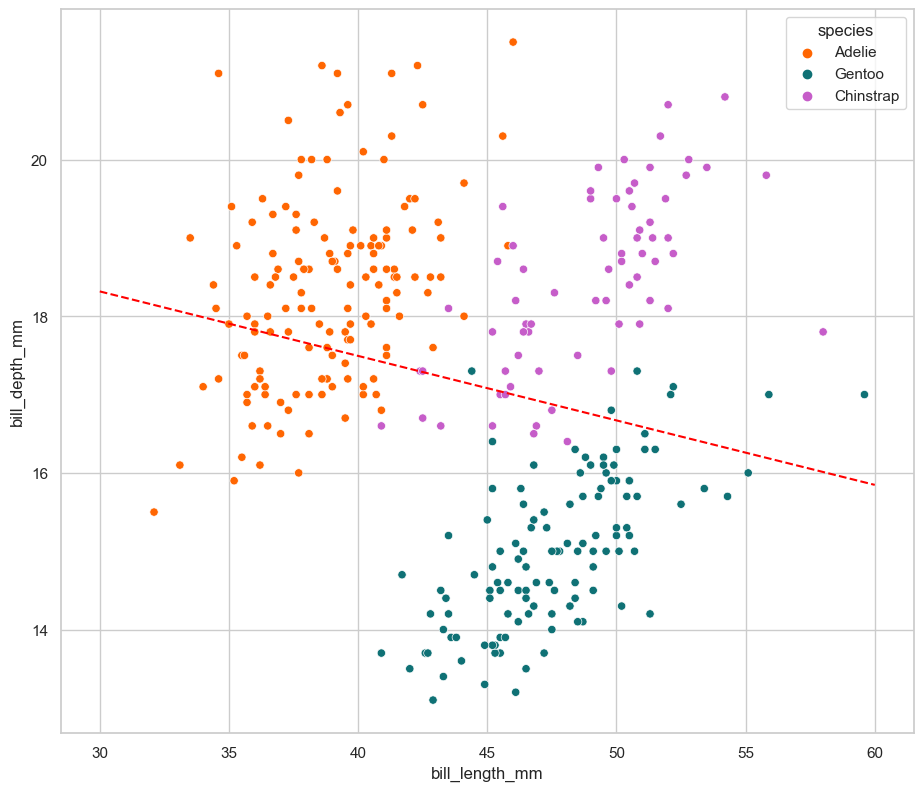

In [82]:
sns.scatterplot(data=p_penguins,x='bill_length_mm',y='bill_depth_mm',
                hue='species',palette=penguin_color)
res = scipy.stats.linregress(x=p_penguins.bill_length_mm,
                            y=p_penguins.bill_depth_mm)
res
x = np.linspace(30,60)
y = list(map(lambda i: res.intercept+res.slope*i,x))
plt.plot(x,y,color='red',linestyle='--')


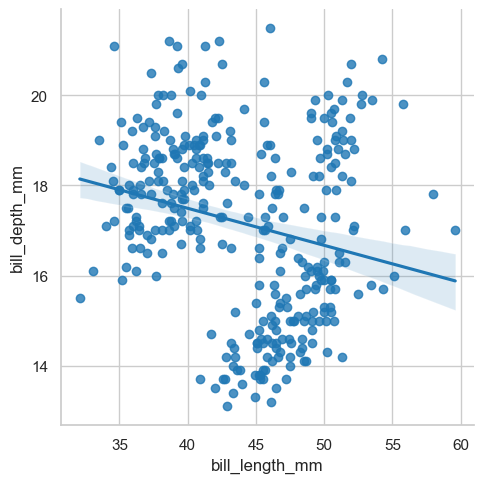

In [83]:
sns.lmplot(data=p_penguins,x='bill_length_mm',
          y='bill_depth_mm')

# Limitaciones del análisis de regresión simple

1. La regresión lineal simple no es simétrica, no es lo mismo la regresión lineal simple de $A,B$ que de $B,A$. 
2. Si dos variables crecen o decrecen siguiendo las mismas pautas, no implica necesariamente causalidad.
3. Solo puede manejar relaciones lineales.

In [84]:
x = p_penguins.bill_length_mm
y = p_penguins.bill_depth_mm

l1 = scipy.stats.linregress(x,y)
l2 = scipy.stats.linregress(y,x)
print(f'{l1}\n{l2}')

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443438e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)
LinregressResult(slope=-0.6349051704195019, intercept=54.89085424504755, rvalue=-0.22862563591302898, pvalue=2.5282897209443438e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)


## La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre múltiples variables

In [85]:
#statsmodels. Evaluar a ~ b
smf.ols(formula='bill_length_mm ~ body_mass_g',
       data=p_penguins).fit().params


Intercept      27.150722
body_mass_g     0.004003
dtype: float64

# Análisis de regresión múltiple

## Olvidé mi báscula para pesar a los pingüinos, ¿cuál sería la mejor forma de capturar ese dato?

### Creando modelos

#### Modelo 1

In [86]:
model_1 = smf.ols(formula='body_mass_g ~ bill_length_mm',
                 data=p_penguins).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           1.54e-32
Time:                        12:20:05   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Modelo 2

In [87]:
model_2 = smf.ols(formula='body_mass_g ~ bill_length_mm + bill_depth_mm',
                 data=p_penguins).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           7.04e-46
Time:                        12:20:05   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Modelo 3

In [88]:
model_3 = smf.ols(formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
                 data=p_penguins).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          9.26e-103
Time:                        12:20:05   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 4

In [89]:
model_4 = smf.ols(formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)',
                 data=p_penguins).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          6.28e-122
Time:                        12:20:05   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Con respecto a C(sex)[T.male] es importante decir que lo que significa es que en general los machos pesan 541g más que las hembras.

#### Modelo 5

In [90]:
model_5 = smf.ols(formula='body_mass_g ~ flipper_length_mm + C(sex)',
                 data=p_penguins).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          3.53e-118
Time:                        12:20:06   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Visualizando resultados

#### Creación de tabla de resultados

In [91]:
models = pd.DataFrame(
dict(actual_value = p_penguins.body_mass_g,
    prediction_1 = model_1.predict(),
    prediction_2 = model_2.predict(),
    prediction_3 = model_3.predict(),
    prediction_4 = model_4.predict(),
    prediction_5 = model_5.predict(),
    species = p_penguins.species,
    sex = p_penguins.sex))
models

,actual_value,prediction_1,prediction_2,prediction_3,prediction_4,prediction_5,species,sex
0,3750.0,3782.402961,3617.641192,3204.761227,3579.136946,3441.323750,Adelie,male
1,3800.0,3817.119665,3836.725580,3436.701722,3343.220772,3328.384372,Adelie,female
2,3250.0,3886.553073,3809.271371,3906.897032,3639.137335,3751.223949,Adelie,female
4,3450.0,3574.102738,3350.786581,3816.705772,3457.954243,3657.259599,Adelie,female
5,3650.0,3799.761313,3356.140070,3696.168128,3764.536023,3864.163327,Adelie,male
...,...,...,...,...,...,...,...,...
339,4000.0,5231.825347,4706.954140,4599.187485,4455.022405,4662.860306,Chinstrap,male
340,3400.0,4164.286703,4034.121055,4274.552753,3894.857519,4080.099176,Chinstrap,female
341,3775.0,4693.716437,4475.927353,3839.563668,4063.639819,4005.109853,Chinstrap,male
342,4100.0,4797.866549,4449.296758,4720.740455,4652.013882,4803.806832,Chinstrap,male


#### ECDFs

<AxesSubplot: ylabel='Proportion'>

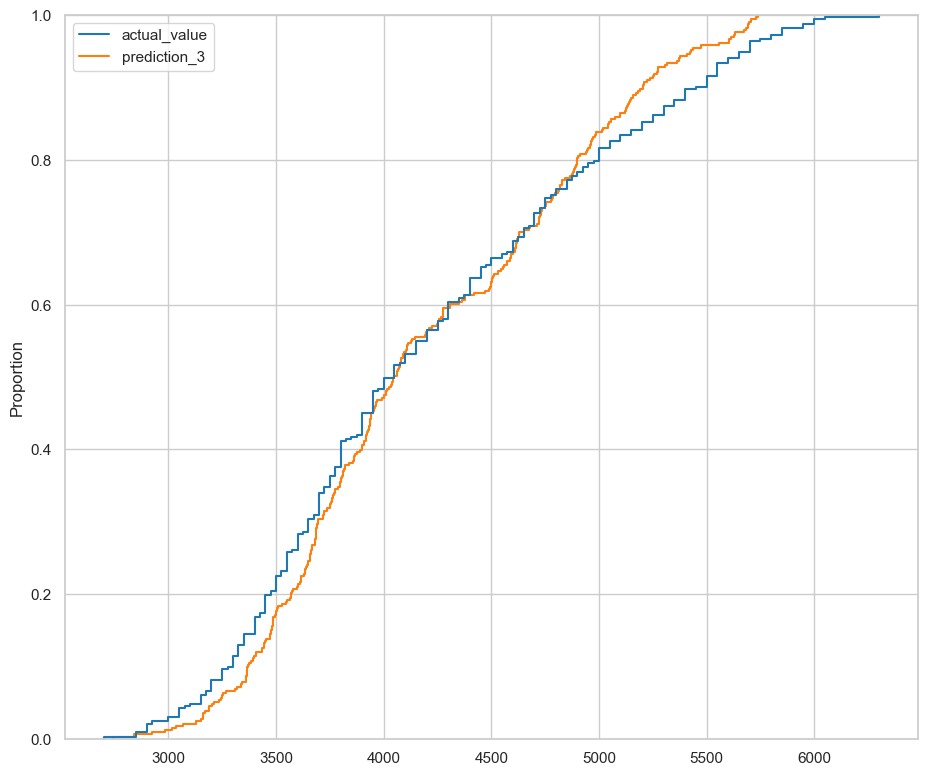

In [92]:
sns.ecdfplot(data=models.select_columns('actual_value','prediction_3'))

#### PDFs

<AxesSubplot: ylabel='Density'>

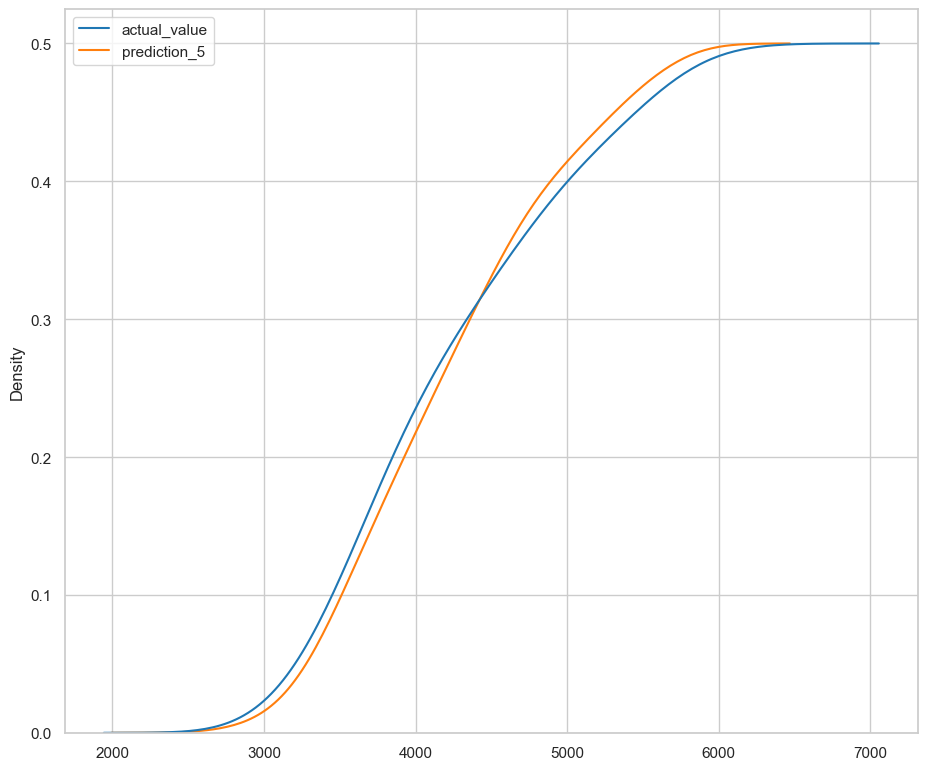

In [93]:
sns.kdeplot(data=models.select_columns('actual_value','prediction_5'),
           cumulative=True)

#### ¿Qué pudimos haber encontrado antes de hacer los modelos?

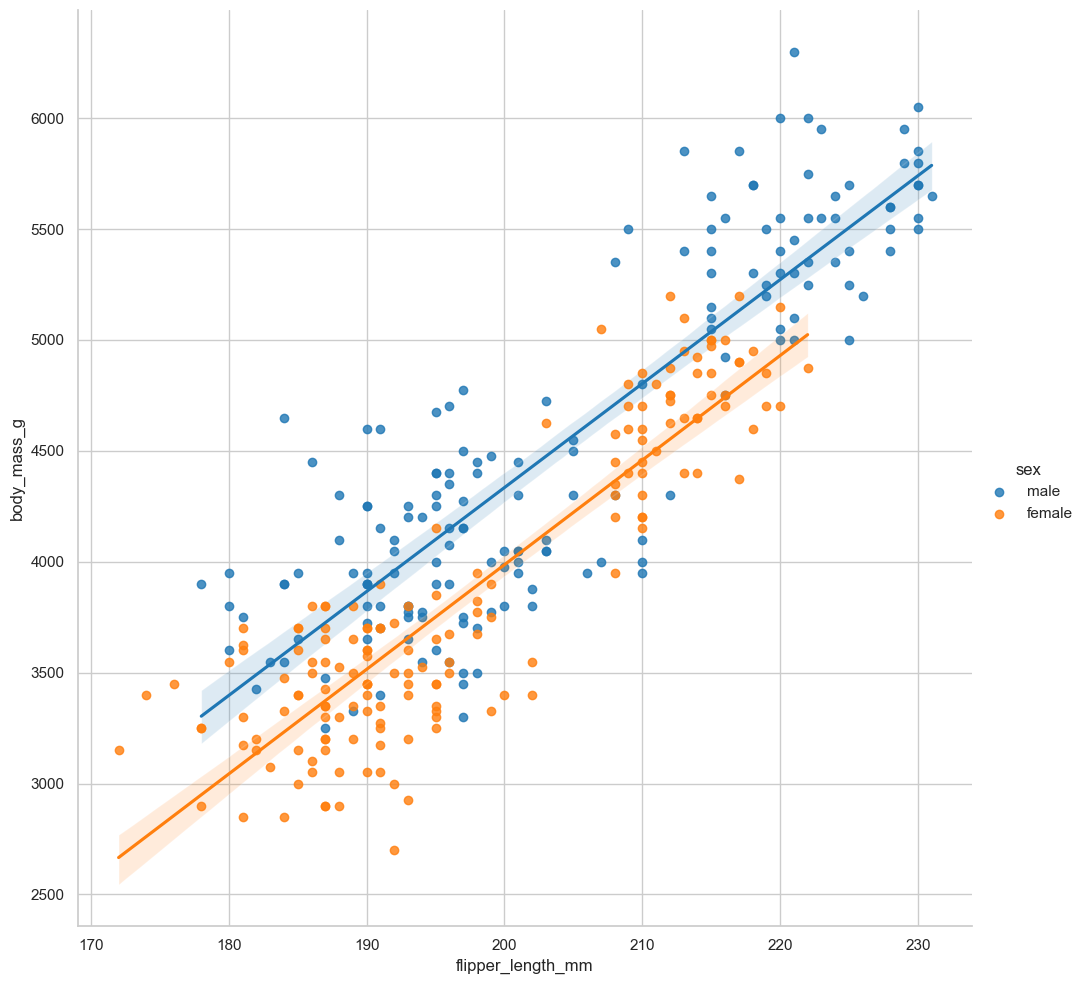

In [94]:
sns.lmplot(data=p_penguins,x='flipper_length_mm',
          y='body_mass_g',hue='sex',height=10)

# Análisis de regresión logística

## ¿Podemos crear un modelo que nos ayude a definir si un pingüino es macho o hembra?

In [131]:
prueba1 = p_penguins.loc[(p_penguins['sex'] == 'male')&(p_penguins['island']=='Biscoe')].count()
display(prueba1)
prueba2 = p_penguins.loc[(p_penguins['sex'] == 'male')&(p_penguins['island']=='Dream')].count()
display(prueba2)
prueba3 = p_penguins.loc[(p_penguins['sex'] == 'male')&(p_penguins['island']=='Torgersen')].count()
display(prueba3)


species              83
island               83
bill_length_mm       83
bill_depth_mm        83
flipper_length_mm    83
body_mass_g          83
sex                  83
year                 83
numeric_sex          83
dtype: int64

species              62
island               62
bill_length_mm       62
bill_depth_mm        62
flipper_length_mm    62
body_mass_g          62
sex                  62
year                 62
numeric_sex          62
dtype: int64

species              23
island               23
bill_length_mm       23
bill_depth_mm        23
flipper_length_mm    23
body_mass_g          23
sex                  23
year                 23
numeric_sex          23
dtype: int64

In [95]:
smf.logit(formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
         data=p_penguins).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Mon, 09 Jan 2023   Pseudo R-squ.:                  0.4793
Time:                        12:20:10   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

## Exploración de nuestras variables categóricas

In [137]:
p_penguins.value_counts(['island','sex'])

island     sex   
Biscoe     male      83
           female    80
Dream      male      62
           female    61
Torgersen  female    24
           male      23
dtype: int64

## ¿Podemos definir un modelo que nos ayude a identificar si un pingüino pertenece a determinada especie?

In [138]:
p_penguins.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [142]:
p_penguins = p_penguins.assign(is_adelie = lambda df: df.species.replace(['Adelie','Chinstrap','Gentoo'],[1,0,0]))

In [143]:
model = smf.logit(formula = 'is_adelie~flipper_length_mm+C(sex)',
                 data=p_penguins).fit()
model.params

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Intercept            40.568368
C(sex)[T.male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

In [154]:
is_adelie_df = pd.DataFrame(dict(actual_adelie = p_penguins.is_adelie,predicted = model.predict().round()))
is_adelie_df

,actual_adelie,predicted
0,1,1.0
1,1,1.0
2,1,0.0
4,1,1.0
5,1,1.0
...,...,...
339,0,0.0
340,0,0.0
341,0,1.0
342,0,0.0


In [155]:
np.corrcoef(is_adelie_df['actual_adelie'],is_adelie_df['predicted'])

array([[1.       , 0.6858182],
       [0.6858182, 1.       ]])

# Paradoja de Simpson:

Es posible que se concluyan dos cosas completamente opuestas dependiendo de cómo se encuentran clasificados.

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

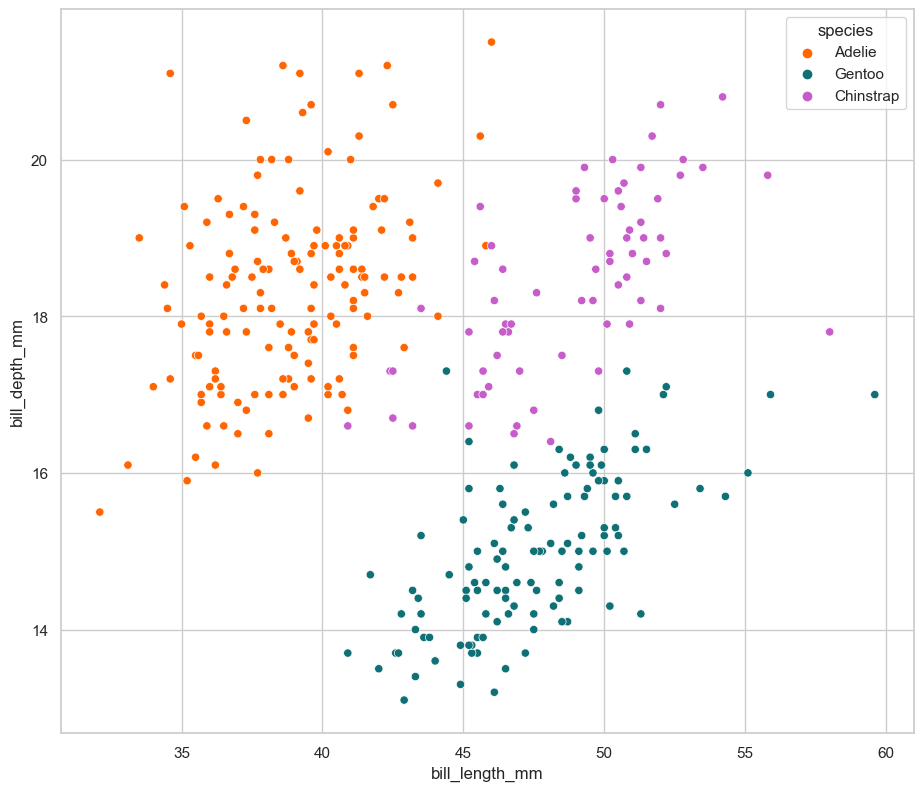

In [158]:
sns.scatterplot(data=p_penguins,x='bill_length_mm',
               y='bill_depth_mm',hue='species',palette=penguin_color)

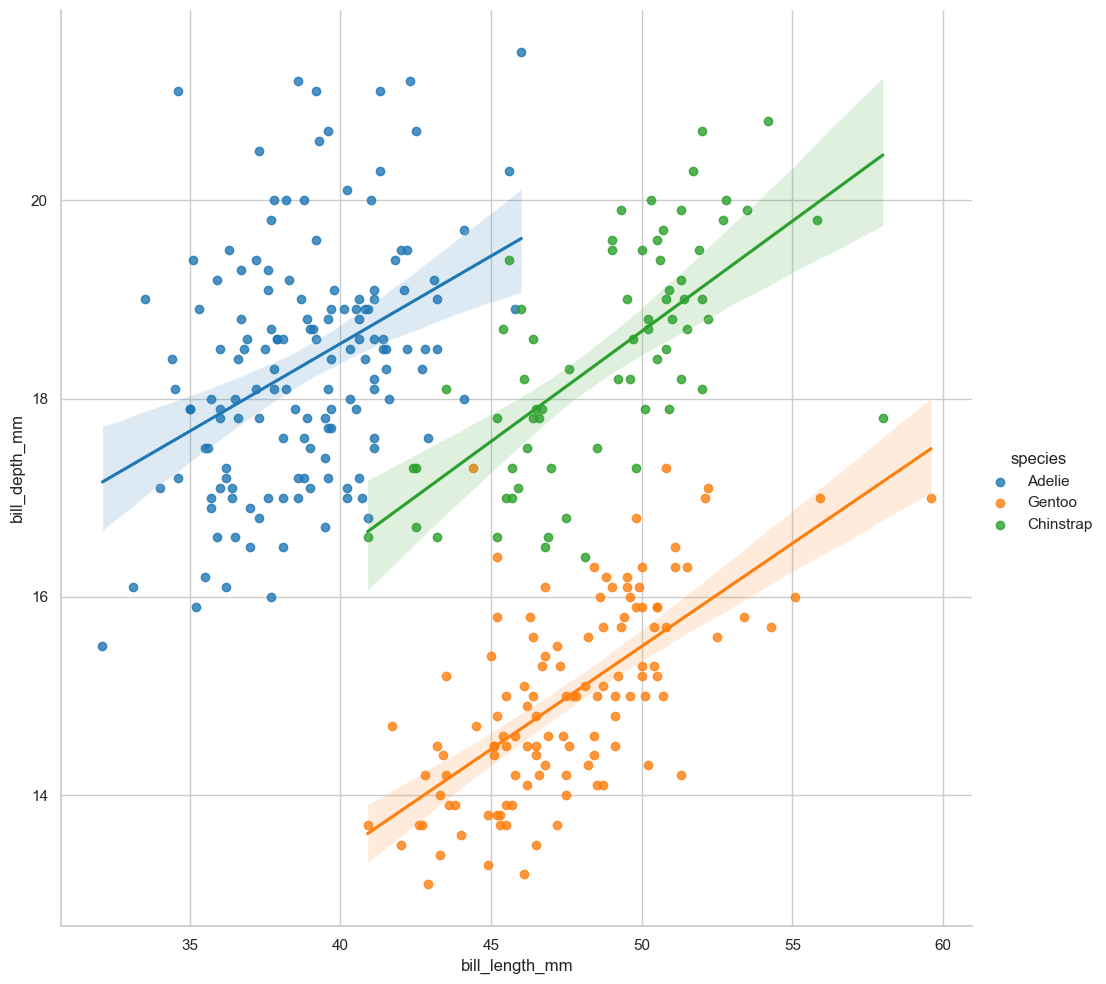

In [160]:
sns.lmplot(data=p_penguins,x='bill_length_mm',
          y='bill_depth_mm',hue='species',height=10)

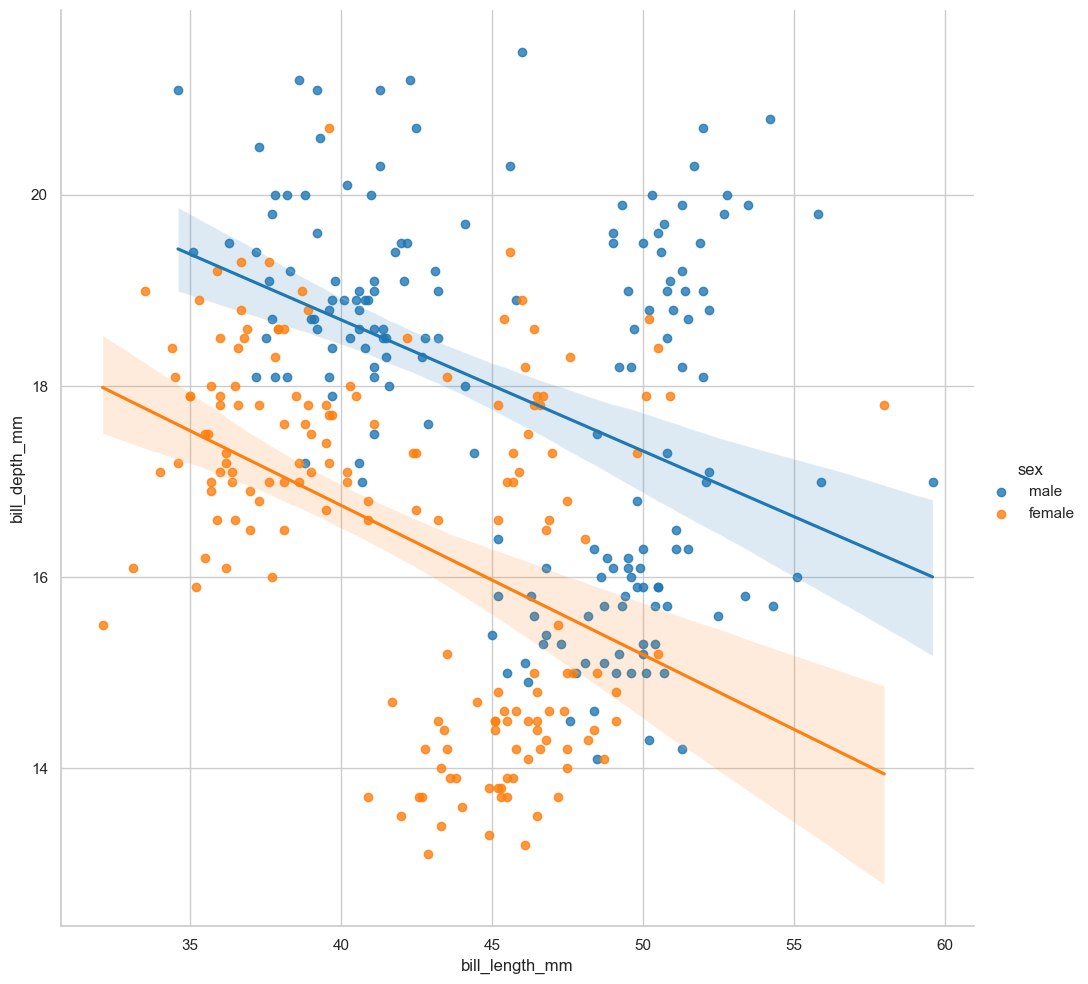

In [161]:
sns.lmplot(data=p_penguins,x='bill_length_mm',
          y='bill_depth_mm',hue='sex',height=10)

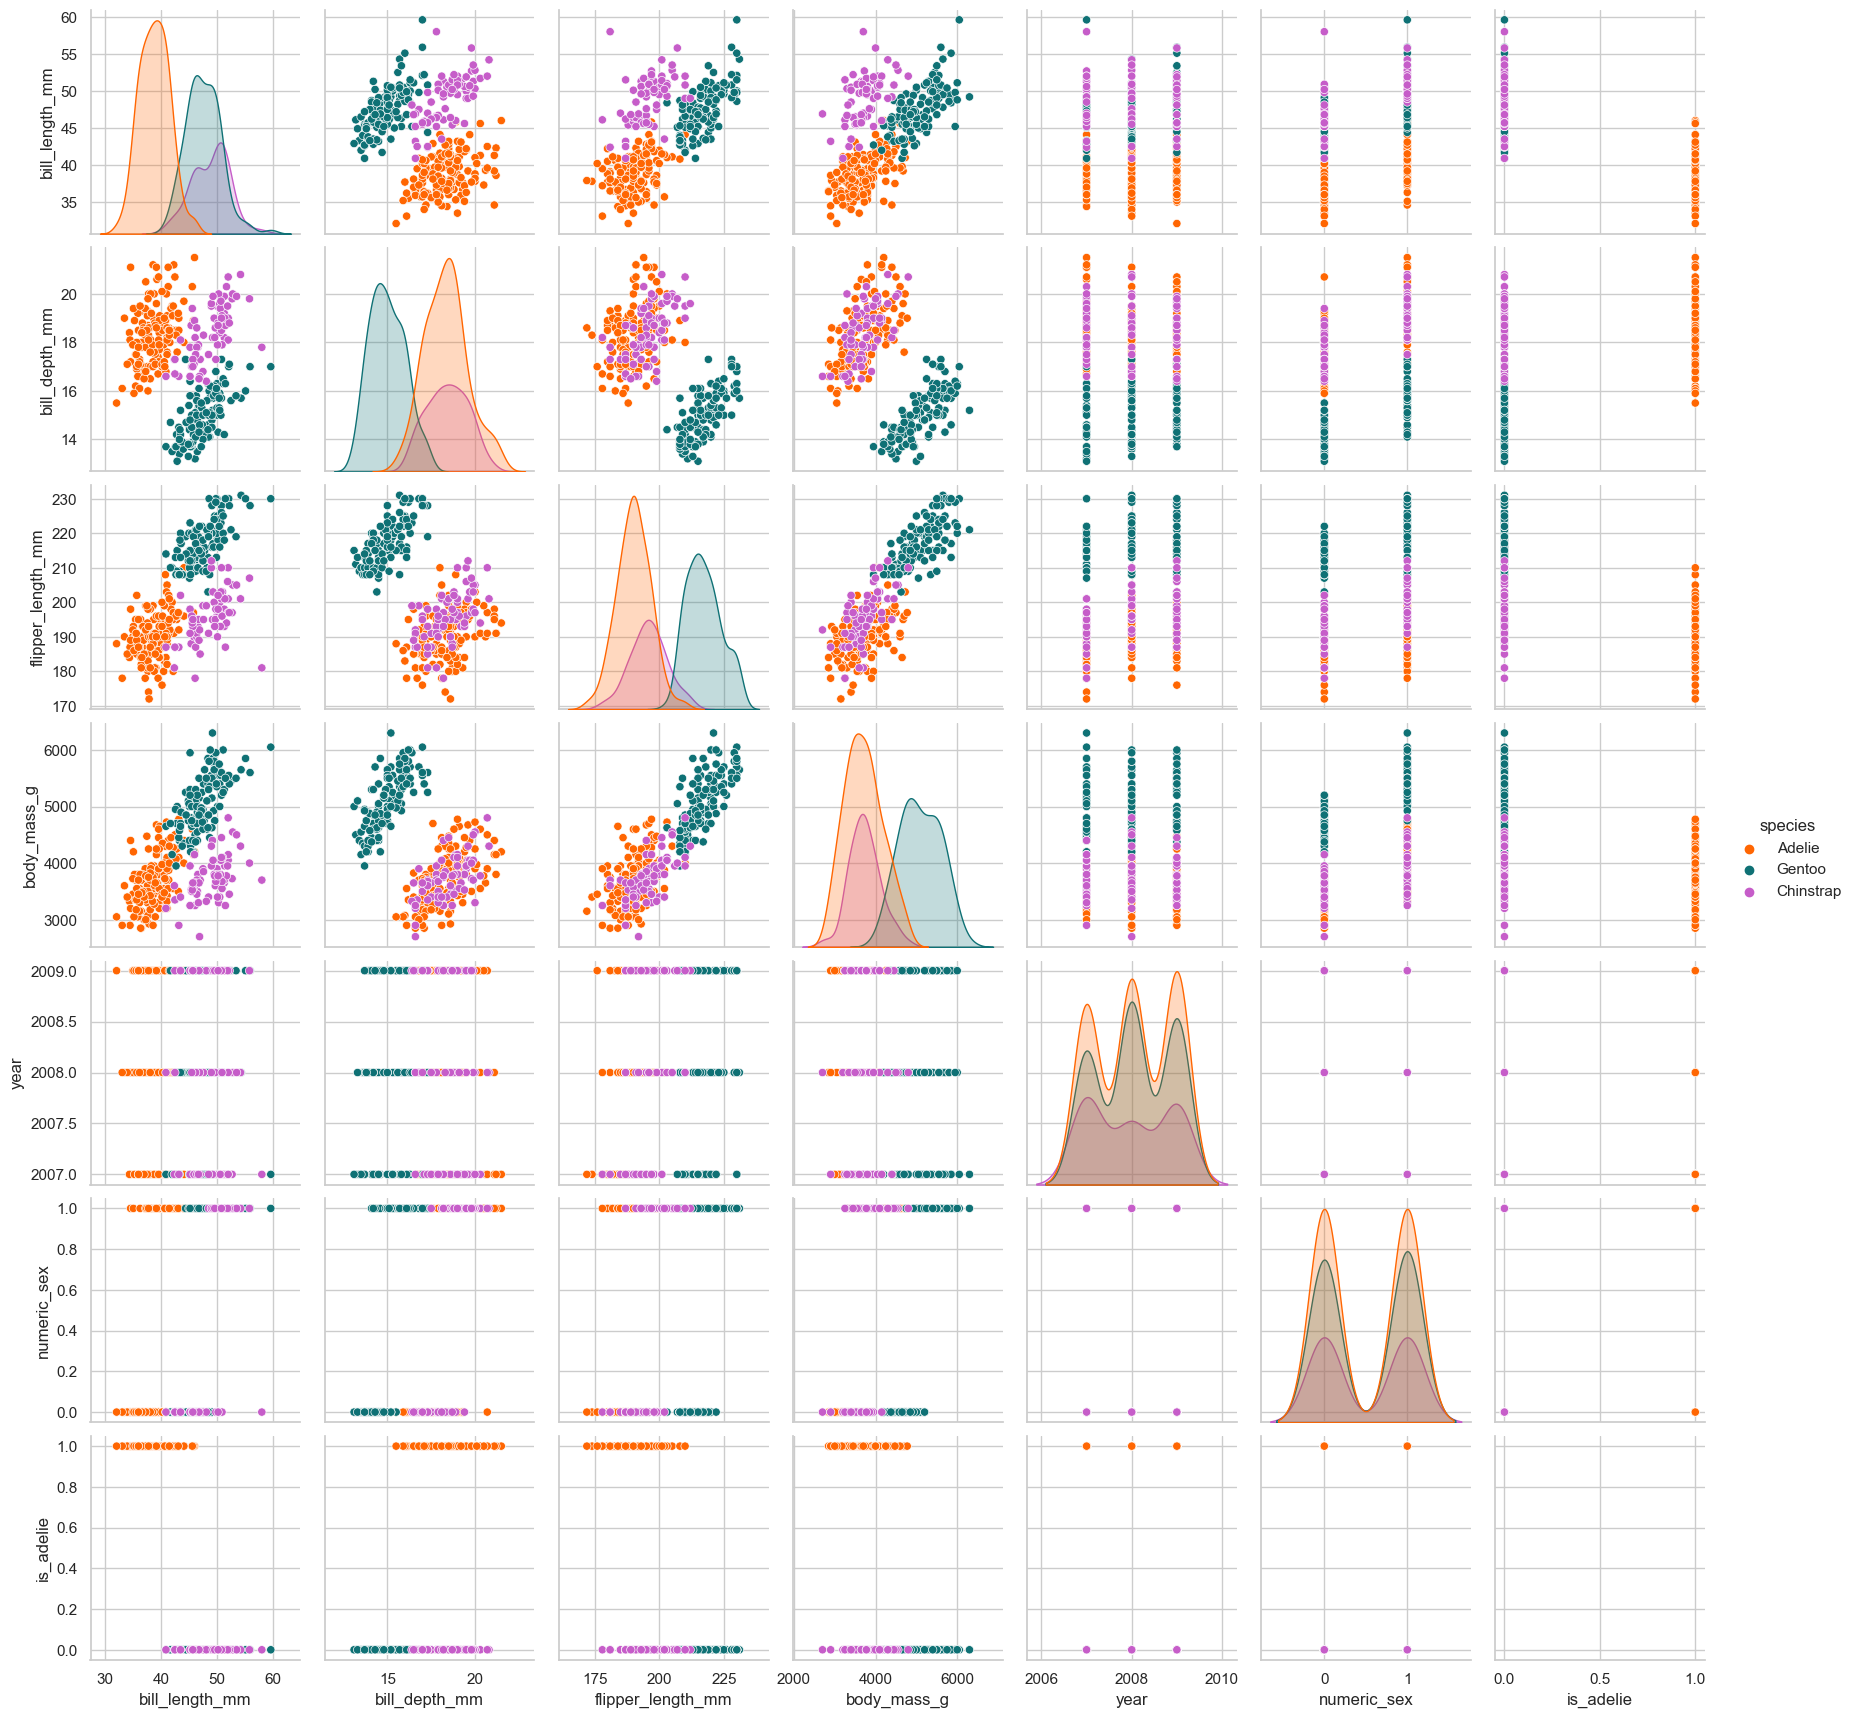

In [165]:
sns.pairplot(data=p_penguins,hue='species',palette=penguin_color)

# <span style="color:royalblue"><center> ¿Qué hacer cuando tenga muchísimas variables?</center></span>

Hacer una reducción de dimensión. 
1. **PCA.**
2. **TSNE (T-distributed Stochastic Neighbot Embedding)**
3. **UMAP: Uniform Mainfold Approximation and Projection for Dimension Reduction**

Hacer una comparación:
Algoritmo de reducción de dimensión vs conjunto de datos.

<img src=ultima.png>

## Información de sesión

In [156]:
session_info.show()